$$\text{Projet Analyse de données}$$

## Sujet : Elections présidentielles 2022
### Abdoulatif Omarjee
### Nour Mahamat Ali
### Bribaud Ludovic

In [2]:
#Importation des librairies
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm

### Exploitation des données

In [3]:
#Lecture du fichier texte
df_brut=pd.read_csv("resultats-par-niveau-burvot-t1-france-entiere.txt",delimiter=';',encoding='ISO-8859-1',header=0)

/tmp/ipykernel_224122/3418776687.py:2: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_brut=pd.read_csv("resultats-par-niveau-burvot-t1-france-entiere.txt",delimiter=';',encoding='ISO-8859-1',header=0)


In [4]:
df_brut.head()

Code du département  \
1 Ain 4 4ème circonscription 1 L'Abergement-Clémenciat 0001 645  108 16,74 537 83,26 16 2,48 2,98 1 0,16 0,19 520 80,62 96,83 1 F ARTHAUD Nathalie 3 0,47 0,58 2 M ROUSSEL Fabien 6  0,93 1,15 3 M MACRON Emmanuel 150 23,26 28,85 4 M LASSALLE Jean 18 2,79 3,46 5 F LE PEN Marine 149 23,10 28,65 6 M ZEMMOUR Éric 43 6,67 8,27 7 M MÉLENCHON Jean-Luc 66  10,23 12,69 8 F HIDALGO Anne 5  0,78 0,96                    9   
      5 5ème circonscription 2 L'Abergement-de-Varey   0001 213  38  17,84 175 82,16 3  1,41 1,71 1 0,47 0,57 171 80,28 97,71 1 F ARTHAUD Nathalie 2 0,94 1,17 2 M ROUSSEL Fabien 7  3,29 4,09 3 M MACRON Emmanuel 50  23,47 29,24 4 M LASSALLE Jean 10 4,69 5,85 5 F LE PEN Marine 23  10,80 13,45 6 M ZEMMOUR Éric 14 6,57 8,19 7 M MÉLENCHON Jean-Luc 41  19,25 23,98 8 F HIDALGO Anne 3  1,41 1,75                    9   
                             4 Ambérieu-en-Bugey       0001 1129 266 23,56 863 76,44 18 1,59 2,09 5 0,44 0,58 840 74,40 97,33 1 F ARTHAUD Nathalie 4 0,35 0,48 2 M ROUSSEL Fabien 30 2,66 3,57 3 M MACRON Emmanuel 159 14,08 18,93 4 M LASSALLE Jean 24 2,13 2,86 5 F LE PEN Marine 237 20,99 28,21 6 M ZEMMOUR Éric 69 6,11 8,21 7 M MÉLENCHON Jean-Luc 216 19,13 25,71 8 F HIDALGO Anne 15 1,33 1,79                    9   
                                                       0002 1128 265 23,49 863 76,51 15 1,33 1,74 6 0,53 0,70 842 74,65 97,57 1 F ARTHAUD Nathalie 6 0,53 0,71 2 M ROUSSEL Fabien 13 1,15 1,54 3 M MACRON Emmanuel 201 17,82 23,87 4 M LASSALLE Jean 19 1,68 2,26 5 F LE PEN Marine 210 18,62 24,94 6 M ZEMMOUR Éric 68 6,03 8,08 7 M MÉLENCHON Jean-Luc 194 17,20 23,04 8 F HIDALGO Anne 19 1,68 2,26                    9   
                                                       0003 1213 246 20,28 967 79,72 10 0,82 1,03 8 0,66 0,83 949 78,24 98,14 1 F ARTHAUD Nathalie 8 0,66 0,84 2 M ROUSSEL Fabien 18 1,48 1,90 3 M MACRON Emmanuel 229 18,88 24,13 4 M LASSALLE Jean 28 2,31 2,95 5 F LE PEN Marine 227 18,71 23,92 6 M ZEMMOUR Éric 74 6,10 7,80 7 M MÉLENCHON Jean-Luc 227 18,71 23,92 8 F HIDALGO Anne 16 1,32 1,69                    9   

                                                                                                                                                                                                                                                                                                                                                                                                       Libellé du département  \
1 Ain 4 4ème circonscription 1 L'Abergement-Clémenciat 0001 645  108 16,74 537 83,26 16 2,48 2,98 1 0,16 0,19 520 80,62 96,83 1 F ARTHAUD Nathalie 3 0,47 0,58 2 M ROUSSEL Fabien 6  0,93 1,15 3 M MACRON Emmanuel 150 23,26 28,85 4 M LASSALLE Jean 18 2,79 3,46 5 F LE PEN Marine 149 23,10 28,65 6 M ZEMMOUR Éric 43 6,67 8,27 7 M MÉLENCHON Jean-Luc 66  10,23 12,69 8 F HIDALGO Anne 5  0,78 0,96                      M   
      5 5ème circonscription 2 L'Abergement-de-Varey   0001 213  38  17,84 175 82,16 3  1,41 1,71 1 0,47 0,57 171 80,28 97,71 1 F ARTHAUD Nathalie 2 0,94 1,17 2 M ROUSSEL Fabien 7  3,29 4,09 3 M MACRON Emmanuel 50  23,47 29,24 4 M LASSALLE Jean 10 4,69 5,85 5 F LE PEN Marine 23  10,80 13,45 6 M ZEMMOUR Éric 14 6,57 8,19 7 M MÉLENCHON Jean-Luc 41  19,25 23,98 8 F HIDALGO Anne 3  1,41 1,75                      M   
                             4 Ambérieu-en-Bugey       0001 1129 266 23,56 863 76,44 18 1,59 2,09 5 0,44 0,58 840 74,40 97,33 1 F ARTHAUD Nathalie 4 0,35 0,48 2 M ROUSSEL Fabien 30 2,66 3,57 3 M MACRON Emmanuel 159 14,08 18,93 4 M LASSALLE Jean 24 2,13 2,86 5 F LE PEN Marine 237 20,99 28,21 6 M ZEMMOUR Éric 69 6,11 8,21 7 M MÉLENCHON Jean-Luc 216 19,13 25,71 8 F HIDALGO Anne 15 1,33 1,79                      M   
                                                       0002 1128 265 23,49 863 76,51 15 1,33 1,74 6 0,53 0,70 842 74,65 97,57 1 F ARTHAUD Nathalie 6 0,53 0,71 2 M ROUSSEL Fabien 13 1,15 1,54 3 M MACRON Emmanuel 201 17,82 23,87 4 M LA

### Lecture et transformation des données du fichier texte

La cellule de code en dessous lit et transforme les données du fichier texte en combinant les informations de base avec celles des candidats pour chaque ligne.

In [5]:
data=[]

with open('resultats-par-niveau-burvot-t1-france-entiere.txt','r',encoding='ISO-8859-1') as file:
    header = file.readline().strip().split(';')
    base_columns = header[:21]
    candidate_columns = ['N°Panneau', 'Sexe', 'Nom', 'Prénom', 'Voix', '% Voix/Ins', '% Voix/Exp']
    for line in file:
        values = line.strip().split(';')
        base_info = values[:21]
        candidate_info = values[21:]
        for i in range(0, len(candidate_info), 7):
            candidate_data = candidate_info[i:i+7]
            full_data = base_info + candidate_data
            data.append(full_data)
final_columns = base_columns + candidate_columns
df = pd.DataFrame(data, columns=final_columns)

On utilise cette ligne de code afin d'examiner l'état actuel de l'espace de travail en affichant toutes les variables définies, leur type, leur taille et une présentation succincte. Cela permet d'examiner les éléments en mémoire et de garantir que les données ont été correctement enregistrées et modifiées. 

In [6]:
whos

Variable            Type             Data/Info
----------------------------------------------
PCA                 ABCMeta          <class 'sklearn.decomposition._pca.PCA'>
StandardScaler      type             <class 'sklearn.preproces<...>ng._data.StandardScaler'>
base_columns        list             n=21
base_info           list             n=21
candidate_columns   list             n=7
candidate_data      list             n=7
candidate_info      list             n=84
cm                  module           <module 'matplotlib.cm' f<...>ckages/matplotlib/cm.py'>
data                list             n=836184
df                  DataFrame               Code du départemen<...>836184 rows x 28 columns]
df_brut             DataFrame                                 <...>[69682 rows x 28 columns]
file                TextIOWrapper    <_io.TextIOWrapper name='<...>r' encoding='ISO-8859-1'>
final_columns       list             n=28
full_data           list             n=28
header              list 

In [30]:
#Affichage des premières lignes du DataFrame transformé
df.head()

Dept Dept_name  Circo Libellé de la circonscription Code de la commune  \
0   01       Ain      4          4ème circonscription                001   
1   01       Ain      4          4ème circonscription                001   
2   01       Ain      4          4ème circonscription                001   
3   01       Ain      4          4ème circonscription                001   
4   01       Ain      4          4ème circonscription                001   

     Libellé de la commune Code du b.vote  Inscrits  Abstentions  % Abs/Ins  \
0  L'Abergement-Clémenciat           0001       645        108.0      16.74   
1  L'Abergement-Clémenciat           0001       645        108.0      16.74   
2  L'Abergement-Clémenciat           0001       645        108.0      16.74   
3  L'Abergement-Clémenciat           0001       645        108.0      16.74   
4  L'Abergement-Clémenciat           0001       645        108.0      16.74   

   ...  Exprimés  % Exp/Ins  % Exp/Vot  Pannel_num  Sexe       Nom    Prénom  \
0  ...       520      80.62      96.83           1     0   ARTHAUD  Nathalie   
1  ...       520      80.62      96.83           2     1   ROUSSEL    Fabien   
2  ...       520      80.62      96.83           3     1    MACRON  Emmanuel   
3  ...       520      80.62      96.83           4     1  LASSALLE      Jean   
4  ...       520      80.62      96.83           5     0    LE PEN    Marine   

   Voix % Voix/Ins  % Voix/Exp  
0     3       0.47        0.58  
1     6       0.93        1.15  
2   150      23.26       28.85  
3    18       2.79        3.46  
4   149      23.10       28.65  

[5 rows x 28 columns]

In [31]:
#Renommer les colonnes du DataFrame
df = df.rename(columns={'Code du département': 'Dept',
                         'Libellé du département': 'Dept_name',
                         'Code de la circonscription': 'Circo',
                         'Blancs': 'Blanc_votes',
                         '% Blancs/Ins': 'Blanc_ins_pct',
                         '% Blancs/Vot': 'Blanc_vot_pct',
                         'Nuls': 'Null_votes',
                         '% Nuls/Ins': 'Null_ins_pct',
                         '% Nuls/Vot': 'Null_vot_pct',
                         'N°Panneau': 'Pannel_num'})

In [32]:
#Affichage des premières lignes du DataFrame
df.head()

Dept Dept_name  Circo Libellé de la circonscription Code de la commune  \
0   01       Ain      4          4ème circonscription                001   
1   01       Ain      4          4ème circonscription                001   
2   01       Ain      4          4ème circonscription                001   
3   01       Ain      4          4ème circonscription                001   
4   01       Ain      4          4ème circonscription                001   

     Libellé de la commune Code du b.vote  Inscrits  Abstentions  % Abs/Ins  \
0  L'Abergement-Clémenciat           0001       645        108.0      16.74   
1  L'Abergement-Clémenciat           0001       645        108.0      16.74   
2  L'Abergement-Clémenciat           0001       645        108.0      16.74   
3  L'Abergement-Clémenciat           0001       645        108.0      16.74   
4  L'Abergement-Clémenciat           0001       645        108.0      16.74   

   ...  Exprimés  % Exp/Ins  % Exp/Vot  Pannel_num  Sexe       Nom    Prénom  \
0  ...       520      80.62      96.83           1     0   ARTHAUD  Nathalie   
1  ...       520      80.62      96.83           2     1   ROUSSEL    Fabien   
2  ...       520      80.62      96.83           3     1    MACRON  Emmanuel   
3  ...       520      80.62      96.83           4     1  LASSALLE      Jean   
4  ...       520      80.62      96.83           5     0    LE PEN    Marine   

   Voix % Voix/Ins  % Voix/Exp  
0     3       0.47        0.58  
1     6       0.93        1.15  
2   150      23.26       28.85  
3    18       2.79        3.46  
4   149      23.10       28.65  

[5 rows x 28 columns]

In [34]:
#Affichage des noms des colonnes du DataFrame
df.columns

Index(['Dept', 'Dept_name', 'Circo', 'Libellé de la circonscription',
       'Code de la commune', 'Libellé de la commune', 'Code du b.vote',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blanc_votes', 'Blanc_ins_pct', 'Blanc_vot_pct', 'Null_votes',
       'Null_ins_pct', 'Null_vot_pct', 'Exprimés', '% Exp/Ins', '% Exp/Vot',
       'Pannel_num', 'Sexe', 'Nom', 'Prénom', 'Voix', '% Voix/Ins',
       '% Voix/Exp'],
      dtype='object')

On supprime les colonnes du DataFrame df qui ne sont pas nécessaires pour l'analyse ultérieure.

In [35]:
#Suppression de colonnes inutiles
df = df.drop(['Libellé de la circonscription', 'Code de la commune', 'Code du b.vote', 
              'Pannel_num'], axis=1)

In [36]:
#Affichage des premières lignes du DataFrame après suppression des colonnes
df.head()

Dept Dept_name  Circo    Libellé de la commune  Inscrits  Abstentions  \
0   01       Ain      4  L'Abergement-Clémenciat       645        108.0   
1   01       Ain      4  L'Abergement-Clémenciat       645        108.0   
2   01       Ain      4  L'Abergement-Clémenciat       645        108.0   
3   01       Ain      4  L'Abergement-Clémenciat       645        108.0   
4   01       Ain      4  L'Abergement-Clémenciat       645        108.0   

   % Abs/Ins  Votants  % Vot/Ins  Blanc_votes  ...  Null_vot_pct  Exprimés  \
0      16.74      537      83.26           16  ...          0.19       520   
1      16.74      537      83.26           16  ...          0.19       520   
2      16.74      537      83.26           16  ...          0.19       520   
3      16.74      537      83.26           16  ...          0.19       520   
4      16.74      537      83.26           16  ...          0.19       520   

   % Exp/Ins  % Exp/Vot  Sexe       Nom    Prénom  Voix  % Voix/Ins % Voix/Exp  
0      80.62      96.83     0   ARTHAUD  Nathalie     3        0.47       0.58  
1      80.62      96.83     1   ROUSSEL    Fabien     6        0.93       1.15  
2      80.62      96.83     1    MACRON  Emmanuel   150       23.26      28.85  
3      80.62      96.83     1  LASSALLE      Jean    18        2.79       3.46  
4      80.62      96.83     0    LE PEN    Marine   149       23.10      28.65  

[5 rows x 24 columns]

In [37]:
#Vérification des types de données des colonnes
df.dtypes

Dept                      object
Dept_name                 object
Circo                      int64
Libellé de la commune     object
Inscrits                   int64
Abstentions              float64
% Abs/Ins                float64
Votants                    int64
% Vot/Ins                float64
Blanc_votes                int64
Blanc_ins_pct            float64
Blanc_vot_pct            float64
Null_votes                 int64
Null_ins_pct             float64
Null_vot_pct             float64
Exprimés                  object
% Exp/Ins                float64
% Exp/Vot                float64
Sexe                       int64
Nom                       object
Prénom                    object
Voix                       int64
% Voix/Ins               float64
% Voix/Exp               float64
dtype: object

On convertit les colonnes spécifiques de df en type entier (int).

In [38]:
#Conversion des types de données des colonnes spécifiques
L_temp=['Circo','Votants','Blanc_votes','Null_votes','Voix', 'Inscrits']
for i in L_temp:
    df[i]=df[i].astype(int)

On convertit les colonnes contenant des pourcentages et des taux en type flottant (float). 

In [39]:
#Conversion des types de données des colonnes de pourcentages et de taux
L_temp=['Abstentions', '% Abs/Ins','% Vot/Ins','Blanc_ins_pct','Blanc_vot_pct','Null_ins_pct','Null_vot_pct','% Exp/Ins',
        '% Exp/Vot','% Voix/Ins','% Voix/Exp']
for i in L_temp:
    df[i]=df[i].astype(str)
    df[i]=df[i].str.replace(',','.')
    df[i]=df[i].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836184 entries, 0 to 836183
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Dept                   836184 non-null  object 
 1   Dept_name              836184 non-null  object 
 2   Circo                  836184 non-null  int64  
 3   Libellé de la commune  836184 non-null  object 
 4   Inscrits               836184 non-null  int64  
 5   Abstentions            836184 non-null  float64
 6   % Abs/Ins              836184 non-null  float64
 7   Votants                836184 non-null  int64  
 8   % Vot/Ins              836184 non-null  float64
 9   Blanc_votes            836184 non-null  int64  
 10  Blanc_ins_pct          836184 non-null  float64
 11  Blanc_vot_pct          836184 non-null  float64
 12  Null_votes             836184 non-null  int64  
 13  Null_ins_pct           836184 non-null  float64
 14  Null_vot_pct           836184 non-nu

On convertit les valeurs de la colonne Sexe de 'F' et 'M' en 0 et 1 respectivement.

In [40]:
#Conversion des valeurs de la colonne "Sexe"
df['Sexe']= df['Sexe'].replace({'F': 0, 'M': 1})

In [41]:
#Vérification des types de données des colonnes après conversions
df.dtypes

Dept                      object
Dept_name                 object
Circo                      int64
Libellé de la commune     object
Inscrits                   int64
Abstentions              float64
% Abs/Ins                float64
Votants                    int64
% Vot/Ins                float64
Blanc_votes                int64
Blanc_ins_pct            float64
Blanc_vot_pct            float64
Null_votes                 int64
Null_ins_pct             float64
Null_vot_pct             float64
Exprimés                  object
% Exp/Ins                float64
% Exp/Vot                float64
Sexe                       int64
Nom                       object
Prénom                    object
Voix                       int64
% Voix/Ins               float64
% Voix/Exp               float64
dtype: object

In [42]:
#Résumé statistique des données
df.describe()

Circo       Inscrits    Abstentions      % Abs/Ins  \
count  836184.000000  836184.000000  836184.000000  836184.000000   
mean        4.185270     699.576304     184.038475      24.119217   
std         3.289359     987.540490     594.867580       9.962403   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000     299.000000      60.000000      18.490000   
50%         3.000000     753.000000     167.000000      22.100000   
75%         5.000000     972.000000     246.000000      26.850000   
max        21.000000  123786.000000   77070.000000     100.000000   

             Votants      % Vot/Ins    Blanc_votes  Blanc_ins_pct  \
count  836184.000000  836184.000000  836184.000000  836184.000000   
mean      515.537829      75.866465       7.801283       1.193693   
std       454.007551       9.999611       6.055156       0.809215   
min         0.000000       0.000000       0.000000       0.000000   
25%       229.000000      73.150000       3.000000       0.720000   
50%       546.000000      77.890000       7.000000       1.100000   
75%       732.000000      81.510000      11.000000       1.540000   
max     54751.000000     100.000000     350.000000      33.330000   

       Blanc_vot_pct     Null_votes   Null_ins_pct   Null_vot_pct  \
count  836184.000000  836184.000000  836184.000000  836184.000000   
mean        1.579474       3.546841       0.565268       0.775410   
std         1.074278      11.103545       1.452815       2.087854   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.980000       1.000000       0.190000       0.250000   
50%         1.460000       3.000000       0.430000       0.560000   
75%         2.020000       5.000000       0.730000       0.970000   
max        50.000000    1504.000000      82.310000     100.000000   

           % Exp/Ins      % Exp/Vot           Sexe           Voix  \
count  836184.000000  836184.000000  836184.000000  836184.000000   
mean       74.107494      97.581989       0.666667      42.015809   
std        10.004039       3.388860       0.471405      85.142376   
min         0.000000       0.000000       0.000000       0.000000   
25%        71.480000      97.170000       0.000000       5.000000   
50%        76.110000      97.880000       1.000000      14.000000   
75%        79.690000      98.460000       1.000000      43.000000   
max       100.000000     100.000000       1.000000   23903.000000   

          % Voix/Ins     % Voix/Exp  
count  836184.000000  836184.000000  
mean        6.175629       8.324962  
std         7.997895      10.834799  
min         0.000000       0.000000  
25%         0.960000       1.330000  
50%         2.480000       3.330000  
75%         7.990000      10.770000  
max       100.000000     100.000000

## Visualisation

La cellule de code en dessous crée et affiche un graphique à barres représentant la distribution des départements. Chaque barre représente un département et la hauteur de la barre indique le nombre de fois que ce département apparaît dans les données.

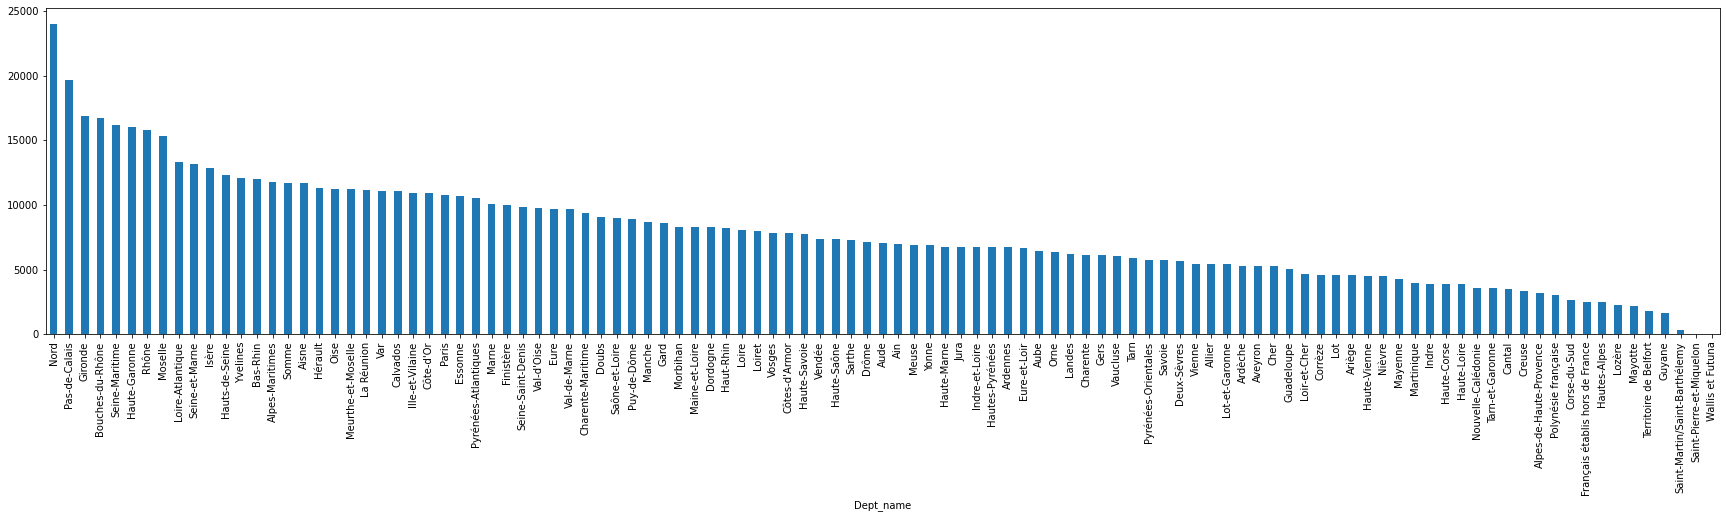

In [43]:
#Visualisation des données - Distribution des départements
plt.figure(figsize=(30,6))
df['Dept_name'].value_counts().plot(kind='bar')
plt.show()

On génère et affiche des histogrammes pour chacune des colonnes de pourcentages. Chaque histogramme montre la distribution des valeurs pour une colonne spécifique de pourcentage, permettant de visualiser comment les valeurs de pourcentage sont réparties dans le dataset. 

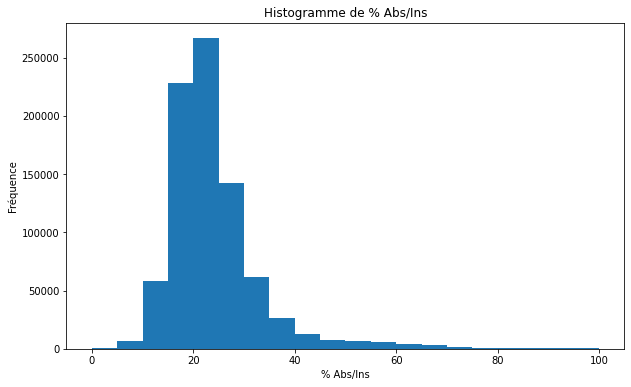

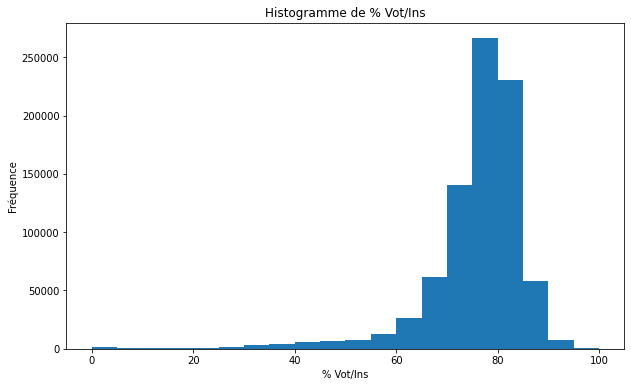

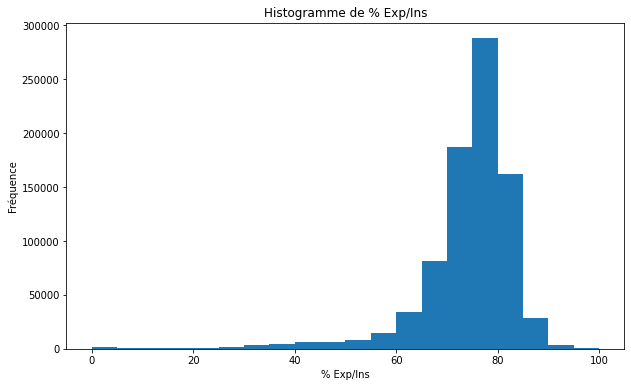

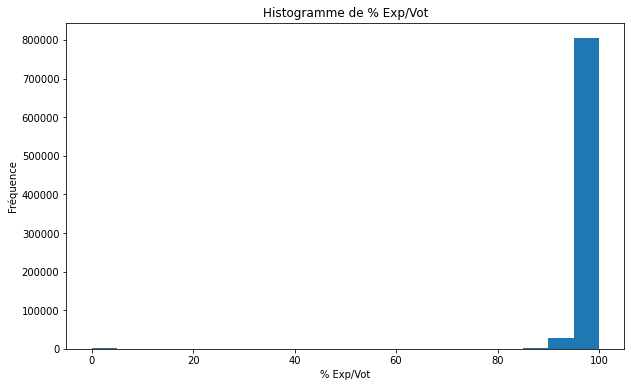

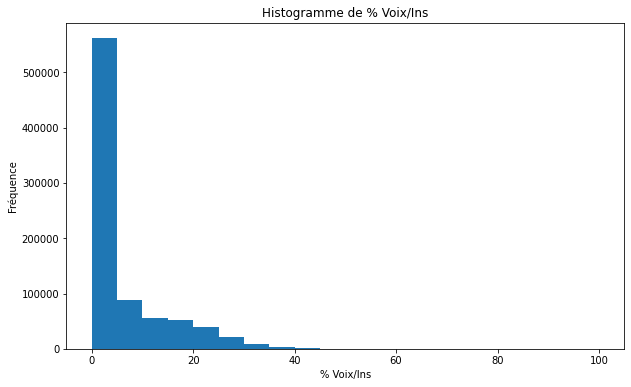

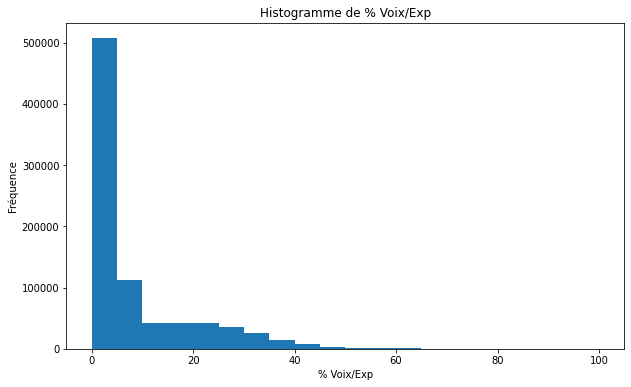

In [44]:
#Visualisation des distributions des pourcentages
col_pourcentages=['% Abs/Ins','% Vot/Ins','% Exp/Ins','% Exp/Vot','% Voix/Ins','% Voix/Exp']

for col in col_pourcentages:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=20)
    plt.title(f'Histogramme de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

### Histogramme 1 : % Abs/Ins
- La majorité des valeurs de pourcentage d'abstention par rapport aux inscrits se situe entre 10% et 40%, avec un pic autour de 20%.

- Cela indique que dans la plupart des cas, environ 20% des électeurs inscrits ne participent pas au vote, avec une distribution assez concentrée autour de cette valeur.

### Histogramme 2 : % Vot/Ins
- La distribution montre que la plupart des pourcentages de votants par rapport aux inscrits sont élevés, principalement entre 60% et 90%, avec un pic autour de 80%.

- Cela suggère une forte participation électorale dans la plupart des cas, indiquant que les trois quarts des électeurs inscrits ont voté.

### Histogramme 3 : % Exp/Ins
- La majorité des pourcentages de votes exprimés par rapport aux inscrits se situe entre 60% et 80%, avec un pic très prononcé autour de 80%.

- Cela indique que la plupart des électeurs inscrits ont exprimé un vote valide, reflétant une participation effective des votants inscrits.

### Histogramme 4 : % Exp/Vot
- Cet histogramme montre une distribution très concentrée autour de 100%, indiquant que presque tous les votes sont exprimés comme valides.

- Ceci est attendu, car les votes exprimés représentent les votes qui ne sont ni blancs ni nuls.

### Histogramme 5 : % Voix/Ins
- La majorité des pourcentages de voix par rapport aux inscrits se situe entre 0% et 10%, avec un pic très élevé près de 0%.

- Cela suggère que dans la plupart des cas, un petit pourcentage des inscrits a voté pour un candidat spécifique, ce qui est logique puisque les voix sont divisées entre plusieurs candidats.

### Histogramme 6 : % Voix/Exp
- La distribution montre que la majorité des pourcentages de voix par rapport aux votes exprimés se situe entre 0% et 20%, avec un pic très élevé près de 0%.

- Ceci est similaire à l'histogramme précédent et reflète que les voix sont réparties entre de nombreux candidats, chacun obtenant une petite fraction des votes exprimés.


In [20]:
# Calcul du taux de participation par département
participation_dept = df.groupby('Dept_name')['Votants'].sum() / df.groupby('Dept_name')['Inscrits'].sum() * 100
participation_dept = participation_dept.reset_index().rename(columns={0: 'Taux de Participation (%)'})

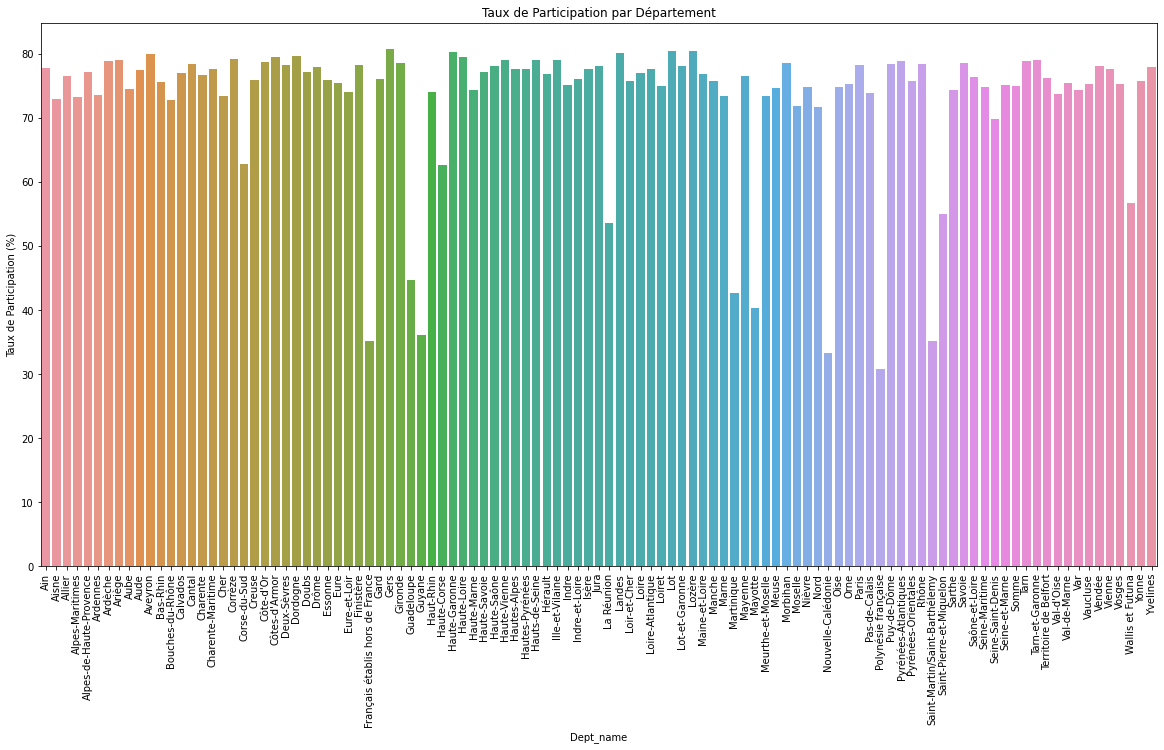

In [21]:
# Visualisation du taux de participation par département
plt.figure(figsize=(20, 10))
sns.barplot(x='Dept_name', y='Taux de Participation (%)', data=participation_dept)
plt.xticks(rotation=90)
plt.title('Taux de Participation par Département')
plt.show()

Le graphique au dessus permet de visualiser facilement les différences de taux de participation électorale entre les départements.

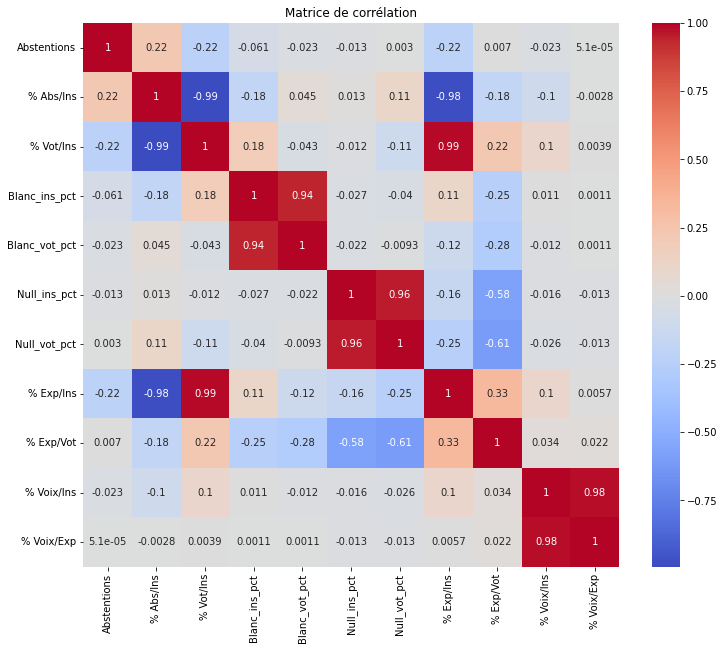

In [45]:
#Matrice de corrélation des pourcentages
correlation_matrix = df[df.select_dtypes(include=['float']).columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

Les corrélations fortes (positives ou négatives) entre certaines paires de variables confirment des comportements électoraux intuitifs, tels que la relation entre les votes exprimés et les voix pour les candidats.

In [51]:
# Affichage des résultats
print(participation_dept)

                   Dept_name  Taux de Participation (%)
0                        Ain                  77.735906
1                      Aisne                  72.937860
2                     Allier                  76.600358
3            Alpes-Maritimes                  73.252657
4    Alpes-de-Haute-Provence                  77.130588
..                       ...                        ...
102                   Vienne                  77.679234
103                   Vosges                  75.203031
104         Wallis et Futuna                  56.706549
105                    Yonne                  75.815378
106                 Yvelines                  77.975646

[107 rows x 2 columns]


Calcule du taux de participation électorale pour chaque circonscription en France. En agrégeant les données par circonscription et en calculant le rapport entre le nombre de votants et le nombre d'inscrits, le code génère un pourcentage qui représente le taux de participation pour chaque circonscription. 

In [52]:
# Calcul du taux de participation par circonscription
participation_circo = df.groupby('Circo')['Votants'].sum() / df.groupby('Circo')['Inscrits'].sum() * 100
participation_circo = participation_circo.reset_index().rename(columns={0: 'Taux de Participation (%)'})

In [53]:
# Affichage des résultats
print(participation_circo)

    Circo  Taux de Participation (%)
0       1                  72.738979
1       2                  73.655525
2       3                  74.128778
3       4                  74.363518
4       5                  75.033108
5       6                  74.371908
6       7                  72.364813
7       8                  71.671717
8       9                  73.281637
9      10                  74.224357
10     11                  71.407205
11     12                  76.439402
12     13                  75.278033
13     14                  75.243477
14     15                  76.782242
15     16                  73.338812
16     17                  71.675373
17     18                  74.515261
18     19                  70.976359
19     20                  68.986020
20     21                  70.754659


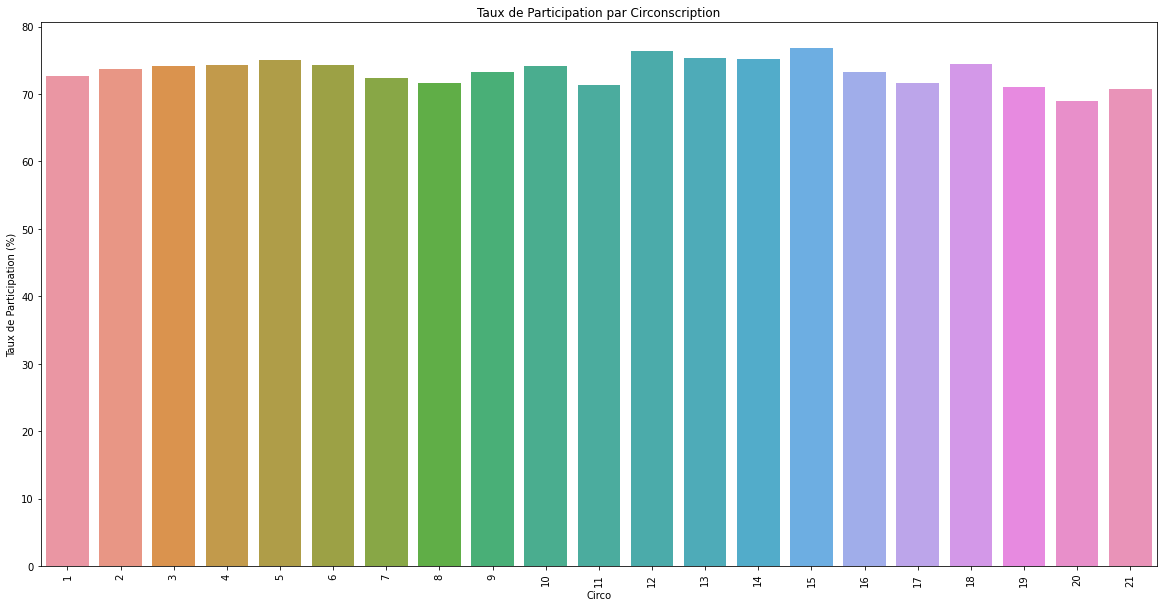

In [54]:
# Visualisation du taux de participation par circonscription
plt.figure(figsize=(20, 10))
sns.barplot(x='Circo', y='Taux de Participation (%)', data=participation_circo)
plt.xticks(rotation=90)
plt.title('Taux de Participation par Circonscription')
plt.show()

Calcule du pourcentage de votes blancs pour chaque département en France. En agrégeant les données par département et en calculant le rapport entre le nombre de votes blancs et le nombre total de votants, le code génère un pourcentage représentant le taux de votes blancs pour chaque département.

In [55]:
# Calcul du pourcentage de votes blancs par département
blancs_dept = df.groupby('Dept_name')['Blanc_votes'].sum() / df.groupby('Dept_name')['Votants'].sum() * 100
blancs_dept = blancs_dept.reset_index().rename(columns={0: 'Taux de Votes Blancs (%)'})

In [56]:
# Affichage des résultats
print(blancs_dept)

                   Dept_name  Taux de Votes Blancs (%)
0                        Ain                  1.656351
1                      Aisne                  1.382614
2                     Allier                  1.957764
3            Alpes-Maritimes                  1.323790
4    Alpes-de-Haute-Provence                  1.496179
..                       ...                       ...
102                   Vienne                  1.705040
103                   Vosges                  1.641635
104         Wallis et Futuna                  0.499722
105                    Yonne                  1.504922
106                 Yvelines                  1.280924

[107 rows x 2 columns]


On crée et affiche un graphique à barres représentant le pourcentage de votes blancs par département en France. Chaque barre représente un département, et la hauteur de la barre indique le pourcentage de votes blancs.

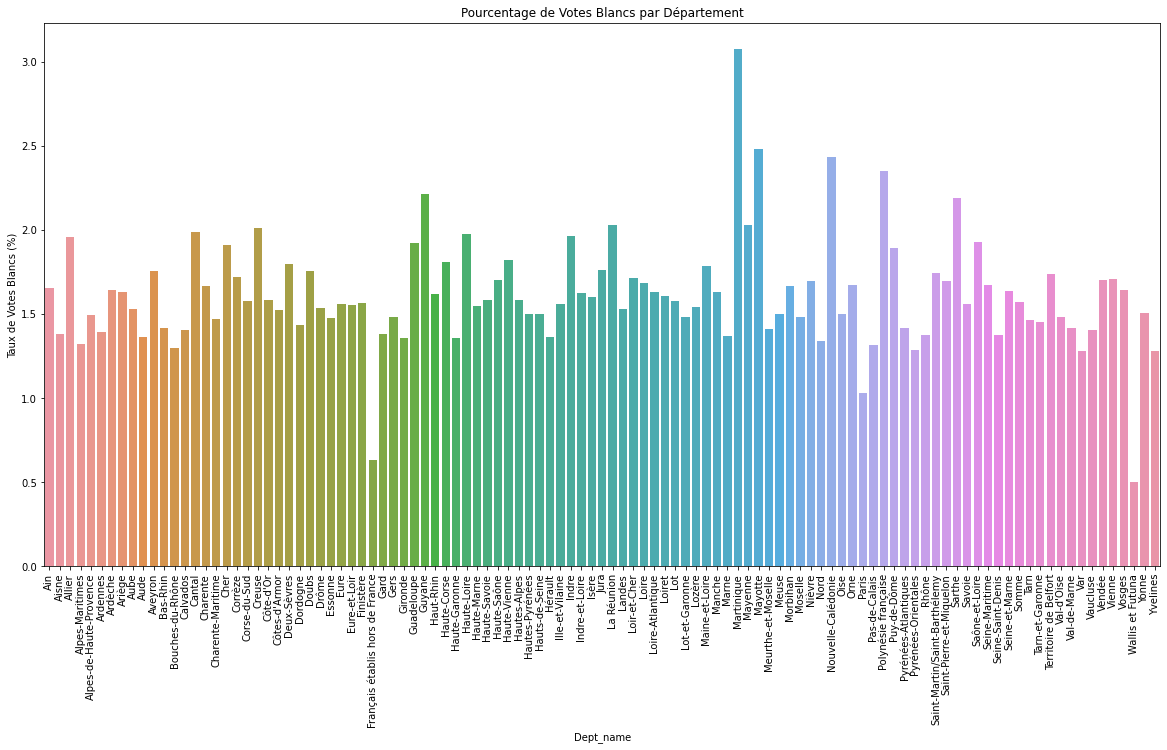

In [57]:
# Visualisation du pourcentage de votes blancs par département
plt.figure(figsize=(20, 10))
sns.barplot(x='Dept_name', y='Taux de Votes Blancs (%)', data=blancs_dept)
plt.xticks(rotation=90)
plt.title('Pourcentage de Votes Blancs par Département')
plt.show()

On crée et affiche un graphique à barres représentant le pourcentage de votes nuls par département en France. Chaque barre représente un département, et la hauteur de la barre indique le pourcentage de votes nuls.

In [58]:
# Calcul du pourcentage de votes nuls par département
nuls_dept = df.groupby('Dept_name')['Null_votes'].sum() / df.groupby('Dept_name')['Votants'].sum() * 100
nuls_dept = nuls_dept.reset_index().rename(columns={0: 'Taux de Votes Nuls (%)'})

In [59]:
# Affichage des résultats
print(nuls_dept)

                   Dept_name  Taux de Votes Nuls (%)
0                        Ain                0.558772
1                      Aisne                1.037970
2                     Allier                0.934755
3            Alpes-Maritimes                0.702573
4    Alpes-de-Haute-Provence                0.631675
..                       ...                     ...
102                   Vienne                0.842213
103                   Vosges                0.896655
104         Wallis et Futuna                0.314640
105                    Yonne                0.655182
106                 Yvelines                0.457616

[107 rows x 2 columns]


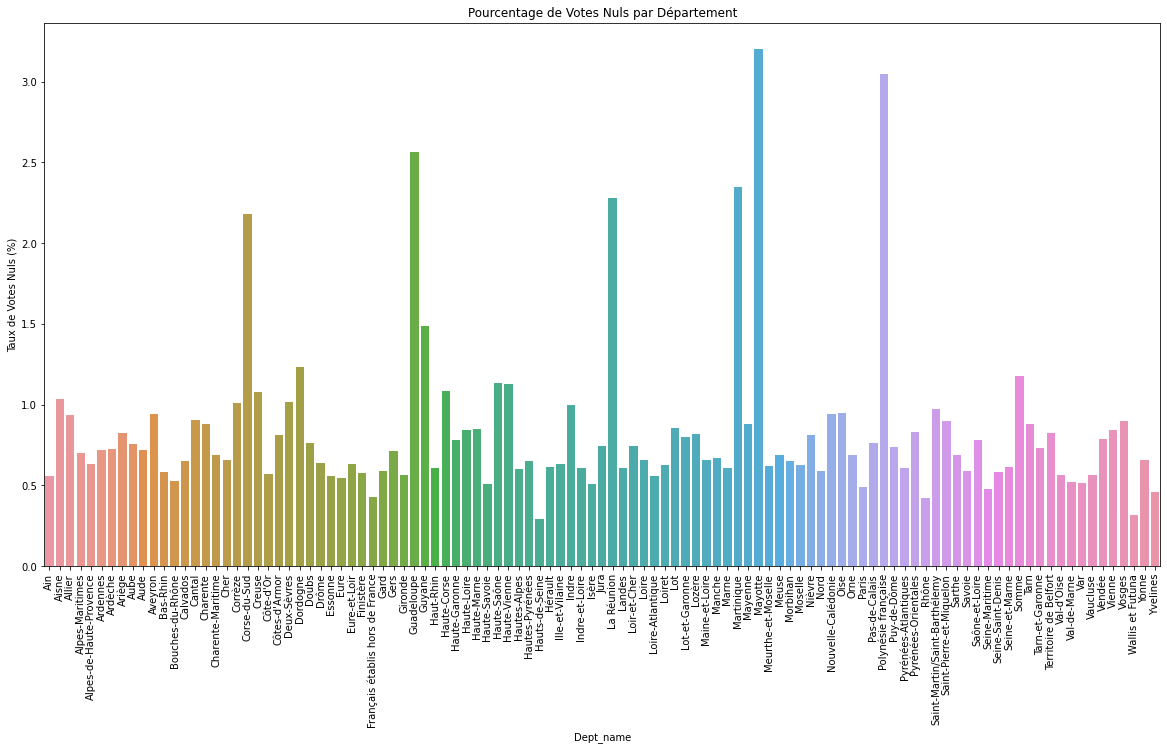

In [60]:
# Visualisation du pourcentage de votes nuls par département
plt.figure(figsize=(20, 10))
sns.barplot(x='Dept_name', y='Taux de Votes Nuls (%)', data=nuls_dept)
plt.xticks(rotation=90)
plt.title('Pourcentage de Votes Nuls par Département')
plt.show()

On crée et affiche un graphique à barres représentant le pourcentage de votes blancs par circonscription en France. Chaque barre représente une circonscription, et la hauteur de la barre indique le pourcentage de votes blancs

In [61]:
# Calcul du pourcentage de votes blancs par circonscription
blancs_circo = df.groupby('Circo')['Blanc_votes'].sum() / df.groupby('Circo')['Votants'].sum() * 100
blancs_circo = blancs_circo.reset_index().rename(columns={0: 'Taux de Votes Blancs (%)'})

In [62]:
# Affichage des résultats
print(blancs_circo)

    Circo  Taux de Votes Blancs (%)
0       1                  1.547252
1       2                  1.582529
2       3                  1.572581
3       4                  1.536589
4       5                  1.508738
5       6                  1.449966
6       7                  1.428409
7       8                  1.442724
8       9                  1.463876
9      10                  1.487057
10     11                  1.337493
11     12                  1.316914
12     13                  1.551887
13     14                  1.295869
14     15                  1.368813
15     16                  1.232024
16     17                  1.212903
17     18                  1.243935
18     19                  1.174774
19     20                  1.075575
20     21                  1.265203


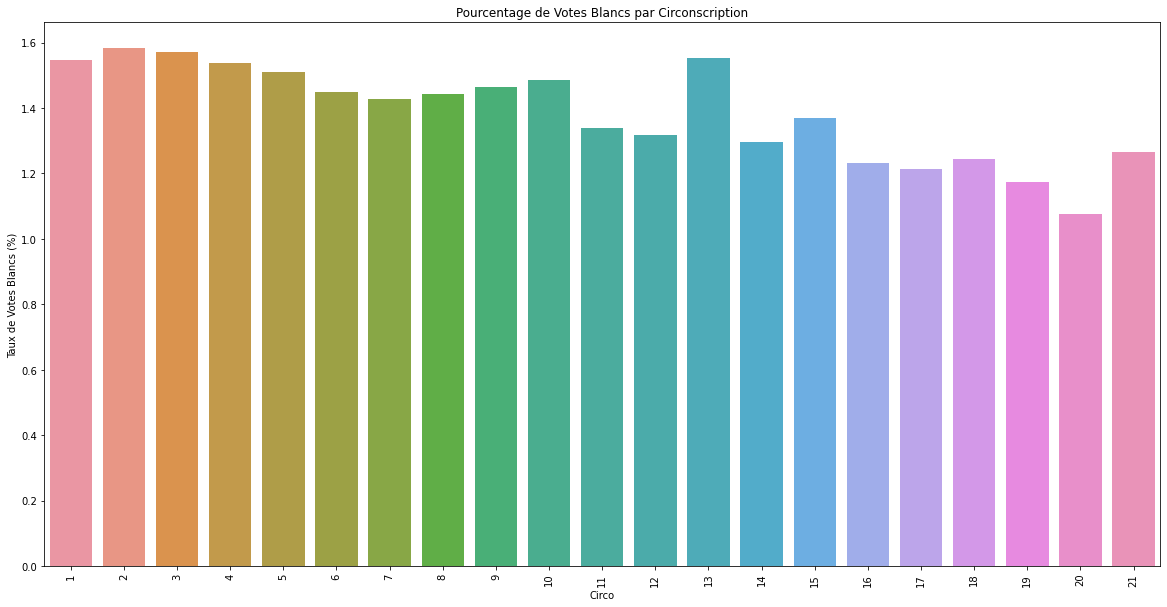

In [63]:
# Visualisation du pourcentage de votes blancs par circonscription
plt.figure(figsize=(20, 10))
sns.barplot(x='Circo', y='Taux de Votes Blancs (%)', data=blancs_circo)
plt.xticks(rotation=90)
plt.title('Pourcentage de Votes Blancs par Circonscription')
plt.show()

Le graphique à barres représentant le pourcentage de votes nuls par circonscription en France est créé et affiché. La hauteur de chaque barre correspond à une circonscription, et le pourcentage de votes nuls est indiqué par la barre. 

In [64]:
# Calcul du pourcentage de votes nuls par circonscription
nuls_circo = df.groupby('Circo')['Null_votes'].sum() / df.groupby('Circo')['Votants'].sum() * 100
nuls_circo = nuls_circo.reset_index().rename(columns={0: 'Taux de Votes Nuls (%)'})

In [65]:
# Affichage des résultats
print(nuls_circo)

    Circo  Taux de Votes Nuls (%)
0       1                0.730277
1       2                0.755742
2       3                0.719704
3       4                0.774428
4       5                0.678040
5       6                0.600925
6       7                0.613162
7       8                0.643065
8       9                0.594146
9      10                0.539998
10     11                0.537746
11     12                0.507329
12     13                0.461125
13     14                0.514306
14     15                0.624179
15     16                0.565725
16     17                0.542968
17     18                0.484401
18     19                0.654215
19     20                0.632168
20     21                0.589728


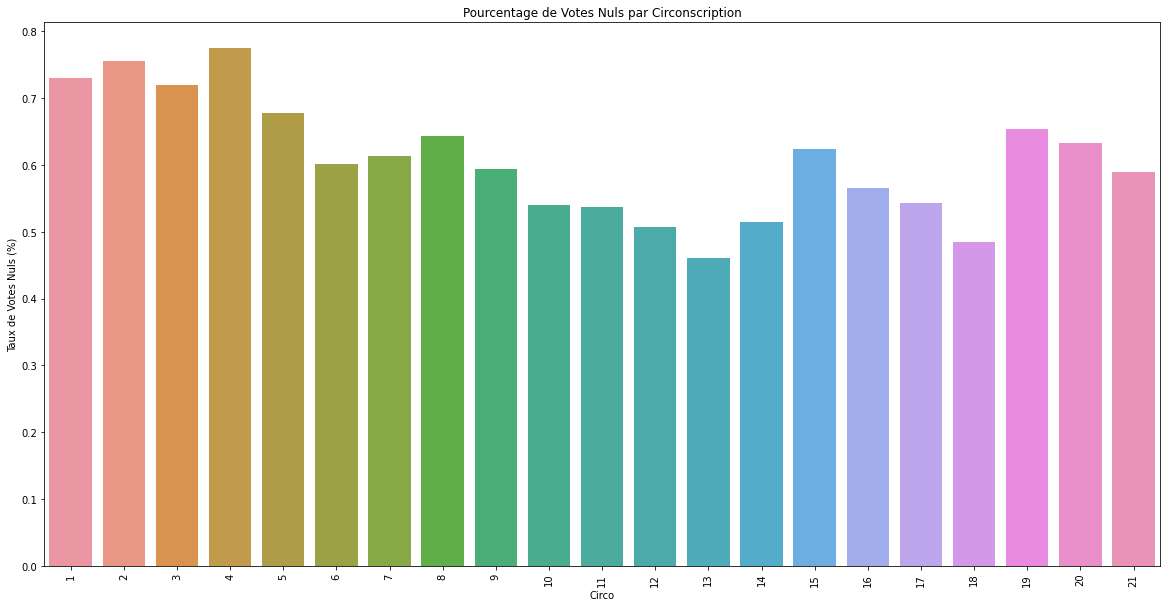

In [66]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Circo', y='Taux de Votes Nuls (%)', data=nuls_circo)
plt.xticks(rotation=90)
plt.title('Pourcentage de Votes Nuls par Circonscription')
plt.show()

### Analyse des Résultats des Candidats

Distribution des voix par candidat : Analyse de la distribution des voix obtenues par chaque candidat et voir si certains candidats se démarquent.


In [67]:
# Calcul du nombre total de voix pour chaque candidat
voix_par_candidat = df.groupby(['Nom', 'Prénom'])['Voix'].sum().reset_index()

In [68]:
# Tri des candidats par nombre de voix décroissant
voix_par_candidat = voix_par_candidat.sort_values(by='Voix', ascending=False)

In [69]:
# Affichage des résultats
print(voix_par_candidat.head(10))  # Affichage des 10 candidats ayant le plus de voix

              Nom    Prénom     Voix
6          MACRON  Emmanuel  9783058
5          LE PEN    Marine  8133828
7       MÉLENCHON  Jean-Luc  7712520
11        ZEMMOUR      Éric  2485226
9        PÉCRESSE   Valérie  1679001
3           JADOT   Yannick  1627853
4        LASSALLE      Jean  1101387
10        ROUSSEL    Fabien   802422
1   DUPONT-AIGNAN   Nicolas   725176
2         HIDALGO      Anne   616478


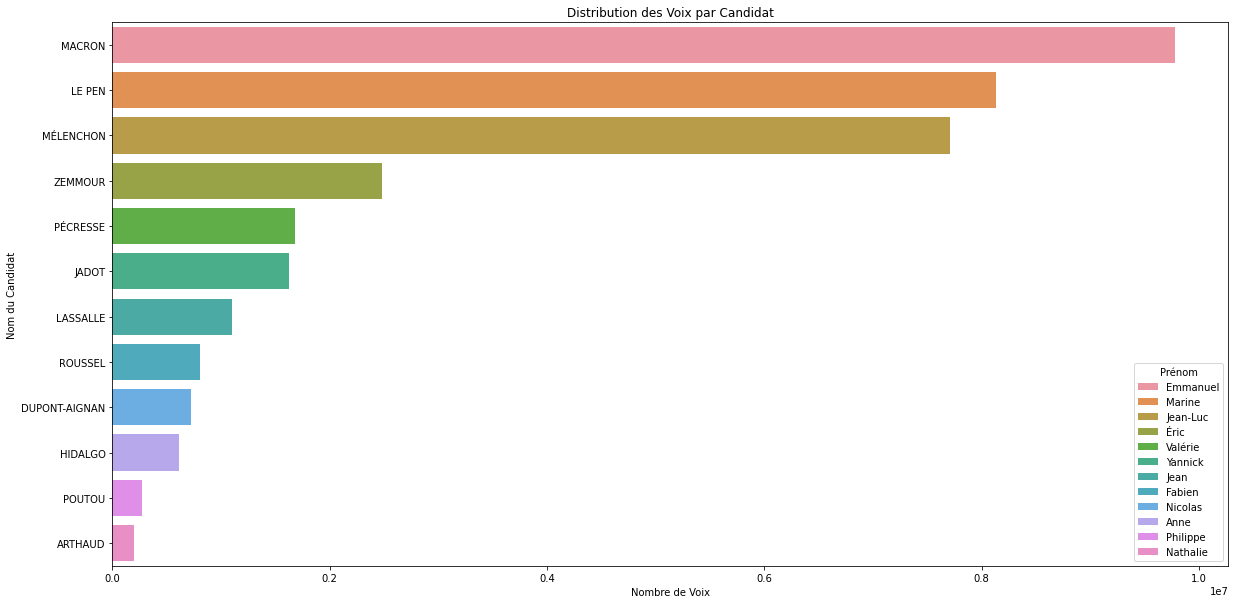

In [70]:
# Visualisation de la distribution des voix obtenues par les candidats
plt.figure(figsize=(20, 10))
sns.barplot(x='Voix', y='Nom', data=voix_par_candidat.head(20), hue='Prénom', dodge=False)  # Affichage des 20 candidats ayant le plus de voix
plt.title('Distribution des Voix par Candidat')
plt.xlabel('Nombre de Voix')
plt.ylabel('Nom du Candidat')
plt.show()

Le graphique met en évidence que MACRON, LE PEN, et MÉLENCHON sont les candidats les plus populaires, avec un net écart entre eux et les autres candidats. La visualisation permet de voir rapidement comment les voix sont distribuées parmi les principaux candidats.

### Analyse des Candidats Se Démarquant


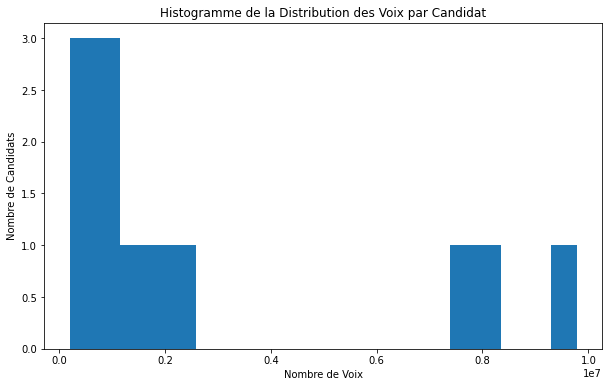

In [71]:
# Visualisation de l'histogramme des voix obtenues par les candidats
plt.figure(figsize=(10, 6))
plt.hist(voix_par_candidat['Voix'], bins=20)
plt.title('Histogramme de la Distribution des Voix par Candidat')
plt.xlabel('Nombre de Voix')
plt.ylabel('Nombre de Candidats')
plt.show()

L'histogramme révèle que la plupart des candidats ont obtenu un nombre relativement faible de voix, avec une poignée de candidats se démarquant par un nombre beaucoup plus élevé de voix. Cela souligne les écarts significatifs dans la popularité des candidats.

### Calcul des performances des candidats par sexe

In [72]:
# Calcul du nombre total de voix pour chaque sexe
voix_par_sexe = df.groupby('Sexe')['Voix'].sum().reset_index()

In [73]:
# Remplacer les valeurs numériques par des labels pour plus de clarté
voix_par_sexe['Sexe'] = voix_par_sexe['Sexe'].replace({0: 'Femmes', 1: 'Hommes'})

In [74]:
# Affichage des résultats
print(voix_par_sexe)

     Sexe      Voix
0  Femmes  10626401
1  Hommes  24506546


Les candidats hommes ont largement surpassé les candidates femmes, ce qui pourrait suggérer une inégalité dans la représentation ou l'efficacité des campagnes électorales.

### Calcul des pourcentages moyens de voix par inscrit et par exprimé pour chaque sexe

In [75]:
# Calcul des pourcentages moyens de voix par inscrit et par exprimé pour chaque sexe
pourcentages_par_sexe = df.groupby('Sexe').agg({
    '% Voix/Ins': 'mean',
    '% Voix/Exp': 'mean'
}).reset_index()

In [76]:
# Remplacer les valeurs numériques par des labels pour plus de clarté
pourcentages_par_sexe['Sexe'] = pourcentages_par_sexe['Sexe'].replace({0: 'Femmes', 1: 'Hommes'})

In [50]:
# Affichage des résultats
print(pourcentages_par_sexe)

     Sexe  % Voix/Ins  % Voix/Exp
0  Femmes    6.078542    8.155314
1  Hommes    6.224173    8.409786


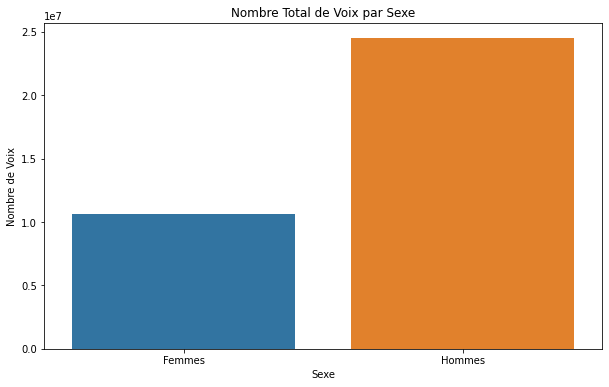

In [51]:
# Visualisation du nombre total de voix par sexe
plt.figure(figsize=(10, 6))
sns.barplot(x='Sexe', y='Voix', data=voix_par_sexe)
plt.title('Nombre Total de Voix par Sexe')
plt.xlabel('Sexe')
plt.ylabel('Nombre de Voix')
plt.show()

Bien que les candidats hommes aient recueilli un nombre total de voix beaucoup plus élevé que les candidates femmes, les pourcentages moyens de voix par inscrit et par exprimé sont relativement similaires entre les deux sexes, avec une légère avance pour les hommes. Cela indique une performance proportionnelle assez équilibrée par rapport au nombre d'inscrits et de voix exprimées, malgré une disparité en termes de nombre total de voix.

### Visualisation des pourcentages moyens de voix par inscrit et par exprimé pour chaque sexe

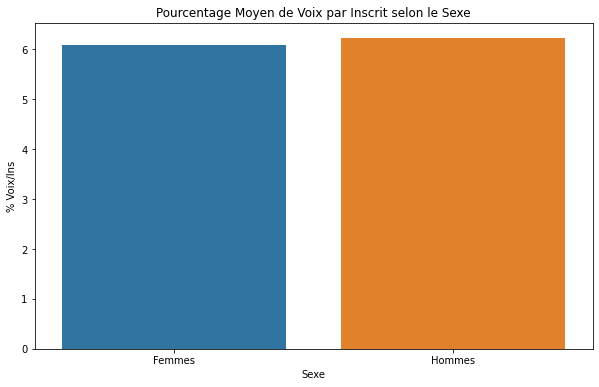

In [52]:
# Visualisation des pourcentages moyens de voix par inscrit pour chaque sexe
plt.figure(figsize=(10, 6))
sns.barplot(x='Sexe', y='% Voix/Ins', data=pourcentages_par_sexe)
plt.title('Pourcentage Moyen de Voix par Inscrit selon le Sexe')
plt.xlabel('Sexe')
plt.ylabel('% Voix/Ins')
plt.show()

Le graphique montre que les candidats hommes ont un pourcentage moyen de voix par inscrit légèrement supérieur à celui des candidates femmes. Cependant, cette différence est assez minime, indiquant que les performances proportionnelles des candidats par inscrit sont relativement équilibrées entre les sexes.

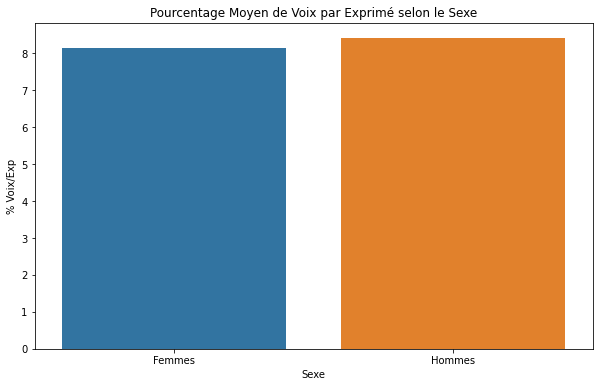

In [53]:
# Visualisation des pourcentages moyens de voix par exprimé pour chaque sexe
plt.figure(figsize=(10, 6))
sns.barplot(x='Sexe', y='% Voix/Exp', data=pourcentages_par_sexe)
plt.title('Pourcentage Moyen de Voix par Exprimé selon le Sexe')
plt.xlabel('Sexe')
plt.ylabel('% Voix/Exp')
plt.show()

Le graphique montre que le pourcentage moyen de voix exprimées est très similaire entre les femmes et les hommes, avec une légère supériorité pour les femmes. Cela suggère que, dans le contexte des données utilisées, il n'y a pas de différence significative entre les sexes en termes de pourcentage de voix exprimées.

## Calcul du taux de participation par circonscription

In [54]:
# Convertir les colonnes 'Votants' et 'Inscrits' en types numériques
df['Votants'] = pd.to_numeric(df['Votants'], errors='coerce')
df['Inscrits'] = pd.to_numeric(df['Inscrits'], errors='coerce')

In [55]:
# Calcul du taux de participation par circonscription
df_circonscription_participation = df.groupby('Circo').agg({'Votants': 'sum', 'Inscrits': 'sum'}).reset_index()

In [56]:
# Calcul du taux de participation
df_circonscription_participation['Taux_participation'] = df_circonscription_participation['Votants'] / df_circonscription_participation['Inscrits'] * 100

In [57]:
# Affichage des premiers résultats
print(df_circonscription_participation.head())

   Circo   Votants   Inscrits  Taux_participation
0      1  73842648  101517300           72.738979
1      2  72985224   99089952           73.655525
2      3  59867940   80762076           74.128778
3      4  48712572   65506008           74.363518
4      5  42086028   56089944           75.033108


Les données montrent le nombre de votants, le nombre d'inscrits et le taux de participation (%) pour les cinq premières circonscriptions. Les taux de participation varient entre environ 72,7% et 75,0%, indiquant un niveau relativement élevé de participation dans ces circonscriptions.

**Identifier les circonscriptions avec le plus fort taux de participation**

In [58]:
# Trier les circonscriptions par taux de participation décroissant
df_circonscription_participation_sorted = df_circonscription_participation.sort_values(by='Taux_participation', ascending=False)

In [59]:
# Affichage des 10 premières circonscriptions
top_circonscriptions = df_circonscription_participation_sorted.head(10)
print(top_circonscriptions)

    Circo   Votants  Inscrits  Taux_participation
14     15   2630016   3425292           76.782242
11     12   6951708   9094404           76.439402
12     13   3945132   5240748           75.278033
13     14   3147540   4183140           75.243477
4       5  42086028  56089944           75.033108
17     18   1439304   1931556           74.515261
5       6  30111600  40487868           74.371908
3       4  48712572  65506008           74.363518
9      10  14117820  19020468           74.224357
2       3  59867940  80762076           74.128778


Les 10 premières circonscriptions avec les taux de participation les plus élevés sont les suivantes :

- Circonscription 15 : 76.78%
- Circonscription 12 : 76.44%
- Circonscription 13 : 75.28%
- Circonscription 14 : 75.24%
- Circonscription 5 : 75.03%
- Circonscription 18 : 74.52%
- Circonscription 6 : 74.37%
- Circonscription 4 : 74.36%
- Circonscription 10 : 74.22%
- Circonscription 3 : 74.13%

Ces données montrent que les taux de participation varient entre environ 74.13% et 76.78%, avec la circonscription 15 ayant le taux de participation le plus élevé.

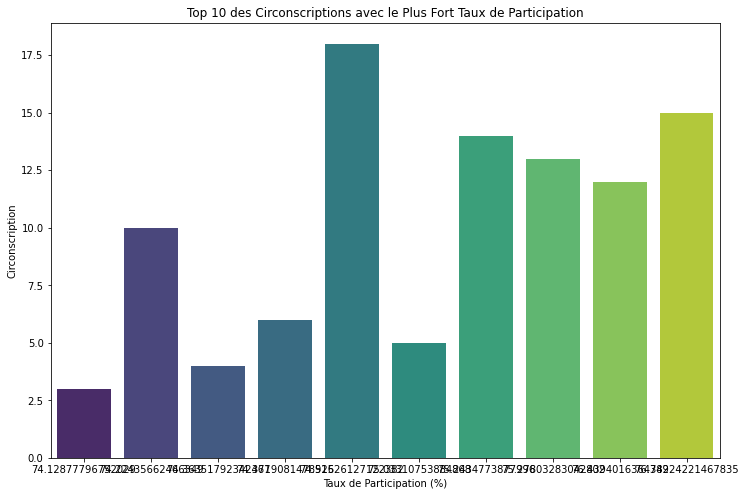

In [60]:
# Visualiser les circonscriptions avec le plus fort taux de participation
plt.figure(figsize=(12, 8))
sns.barplot(x='Taux_participation', y='Circo', data=top_circonscriptions, palette='viridis')
plt.title('Top 10 des Circonscriptions avec le Plus Fort Taux de Participation')
plt.xlabel('Taux de Participation (%)')
plt.ylabel('Circonscription')
plt.show()

Le graphique montre les circonscriptions les plus participatives en termes de pourcentage de participation, permettant de visualiser facilement lesquelles ont les plus hauts taux de participation.

## Facteurs influençant la participation : 
Explorer les facteurs qui pourraient influencer la participation électorale dans différentes circonscriptions (par exemple, la taille de la circonscription, la densité de population).

## Étape 1 : Préparation des données

In [61]:
# Ajout de colonnes factices pour la taille de la circonscription et la densité de population
np.random.seed(42)  # Pour la reproductibilité
df['Taille_circo'] = np.random.randint(5000, 200000, size=len(df))
df['Densite_population'] = np.random.randint(10, 1000, size=len(df))

In [62]:
# Conversion des colonnes nécessaires en types numériques
df['Votants'] = pd.to_numeric(df['Votants'], errors='coerce')
df['Inscrits'] = pd.to_numeric(df['Inscrits'], errors='coerce')

In [63]:
# Calcul du taux de participation par circonscription
df_circonscription_participation = df.groupby('Circo').agg({
    'Votants': 'sum',
    'Inscrits': 'sum',
    'Taille_circo': 'mean',
    'Densite_population': 'mean'
}).reset_index()

In [64]:
# Calcul du taux de participation
df_circonscription_participation['Taux_participation'] = df_circonscription_participation['Votants'] / df_circonscription_participation['Inscrits'] * 100

In [65]:
# Affichage des premiers résultats
print(df_circonscription_participation.head())

   Circo   Votants   Inscrits   Taille_circo  Densite_population  \
0      1  73842648  101517300  102410.814547          504.675862   
1      2  72985224   99089952  102452.522862          504.264890   
2      3  59867940   80762076  102589.316394          505.979810   
3      4  48712572   65506008  102664.211545          503.577199   
4      5  42086028   56089944  102423.592503          504.679339   

   Taux_participation  
0           72.738979  
1           73.655525  
2           74.128778  
3           74.363518  
4           75.033108  


Ces données permettent de comparer les taux de participation électorale et les caractéristiques démographiques moyennes des différentes circonscriptions, en fournissant des informations utiles pour l'analyse électorale et démographique.

## Étape 2 : Analyse des corrélations

In [66]:
# Analyse des corrélations
correlation_matrix = df_circonscription_participation[['Taux_participation', 'Taille_circo', 'Densite_population']].corr()
print(correlation_matrix)

                    Taux_participation  Taille_circo  Densite_population
Taux_participation            1.000000     -0.018753            0.432496
Taille_circo                 -0.018753      1.000000            0.080453
Densite_population            0.432496      0.080453            1.000000


Il y a une corrélation modérée positive entre le taux de participation et la densité de population, ce qui suggère que les zones avec une densité de population plus élevée tendent à avoir des taux de participation plus élevés.
La taille de la circonscription montre une très faible corrélation avec le taux de participation et la densité de population, indiquant qu'elle n'a pas d'impact significatif sur ces variables dans cet ensemble de données.

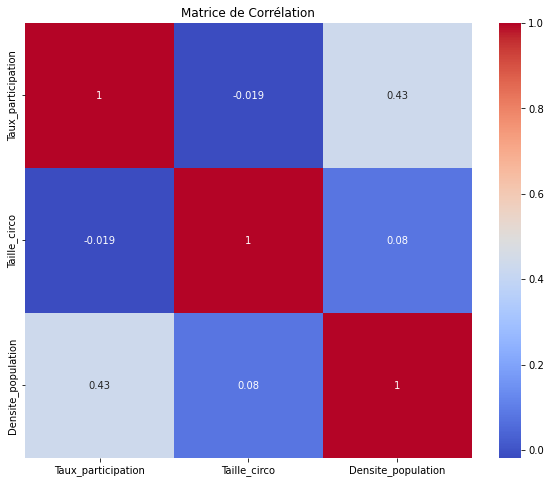

In [67]:
# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()

    Le taux de participation a une corrélation modérément positive (0.43) avec la densité de population.
    La taille de la circonscription a une très faible corrélation négative (-0.019) avec le taux de participation.
    La taille de la circonscription et la densité de population ont une très faible corrélation positive (0.08).

Le graphique montre que la densité de population a un impact modéré sur le taux de participation, tandis que la taille de la circonscription n'a pas d'influence significative.

## Étape 3 : Visualisation des relations

In [1]:
# Visualisation de la relation entre la taille de la circonscription et le taux de participation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Taille_circo', y='Taux_participation', data=df_circonscription_participation)
plt.title('Relation entre la Taille de la Circonscription et le Taux de Participation')
plt.xlabel('Taille de la Circonscription')
plt.ylabel('Taux de Participation (%)')
plt.show()

NameError: name 'plt' is not defined

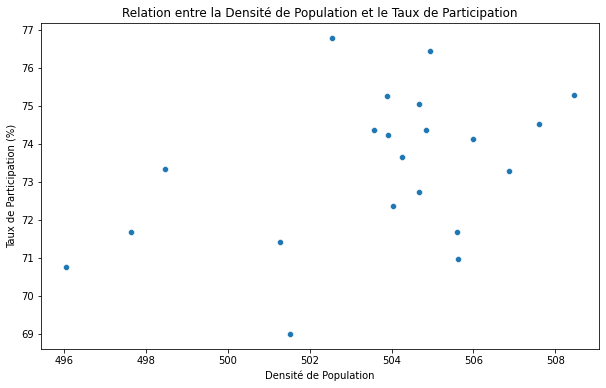

In [69]:
# Visualisation de la relation entre la densité de population et le taux de participation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Densite_population', y='Taux_participation', data=df_circonscription_participation)
plt.title('Relation entre la Densité de Population et le Taux de Participation')
plt.xlabel('Densité de Population')
plt.ylabel('Taux de Participation (%)')
plt.show()

        Une tendance générale montre que les circonscriptions avec une densité de population plus élevée tendent à avoir un taux de participation plus élevé, bien que la corrélation soit modérée.
        Les points sont dispersés, mais une tendance ascendante peut être observée.

Ce graphique illustre visuellement que la densité de population a un impact sur le taux de participation, avec une corrélation positive modérée.

In [70]:
import geopandas as gpd
# Charger le fichier de forme pour les départements
departements = gpd.read_file('contour-des-departements.geojson')

In [71]:
# Vérifiez si les géométries sont valides
departements['is_valid'] = departements.is_valid
print(departements['is_valid'].value_counts())

is_valid
True    96
Name: count, dtype: int64


In [72]:
# Affichez les premières lignes des données géospatiales
print(departements.head())

  code                      nom  \
0   01                      Ain   
1   02                    Aisne   
2   03                   Allier   
3   04  Alpes-de-Haute-Provence   
4   05             Hautes-Alpes   

                                            geometry  is_valid  
0  POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...      True  
1  POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...      True  
2  POLYGON ((3.03207 46.79491, 3.03424 46.79080, ...      True  
3  POLYGON ((5.67604 44.19143, 5.67817 44.19051, ...      True  
4  POLYGON ((6.26057 45.12685, 6.26417 45.12641, ...      True  


In [73]:
# Supprimer les géométries non valides
departements = departements[departements.is_valid]

In [74]:
# Vérifiez les limites des données géospatiales
print(departements.total_bounds)

[-5.14026 41.33363  9.55996 51.089  ]


In [75]:
# Correction des géométries non valides
departements['geometry'] = departements['geometry'].buffer(0)

In [76]:
# Recalculer les limites des données géospatiales après correction
print(departements.total_bounds)

[-5.14026 41.33363  9.55996 51.089  ]


In [77]:
# Afficher les 5 premières lignes pour vérifier
print(departements.head())

  code                      nom  \
0   01                      Ain   
1   02                    Aisne   
2   03                   Allier   
3   04  Alpes-de-Haute-Provence   
4   05             Hautes-Alpes   

                                            geometry  is_valid  
0  POLYGON ((4.78021 46.17668, 4.78024 46.18905, ...      True  
1  POLYGON ((3.17296 50.01131, 3.17382 50.01186, ...      True  
2  POLYGON ((3.03207 46.79491, 3.03424 46.79080, ...      True  
3  POLYGON ((5.67604 44.19143, 5.67817 44.19051, ...      True  
4  POLYGON ((6.26057 45.12685, 6.26417 45.12641, ...      True  


In [78]:
# Agréger les résultats par département
df_dept_participation = df.groupby('Dept').agg({
    'Votants': 'sum',
    'Inscrits': 'sum'
}).reset_index()

In [79]:
# Calculer le taux de participation par département
df_dept_participation['Taux_participation'] = df_dept_participation['Votants'] / df_dept_participation['Inscrits'] * 100

In [80]:
# Fusionner les données géospatiales avec les résultats électoraux
departements = departements.merge(df_dept_participation, left_on='code', right_on='Dept')

## Étape 5 : Fusionner les données géospatiales avec les résultats électoraux

Cartographie des résultats

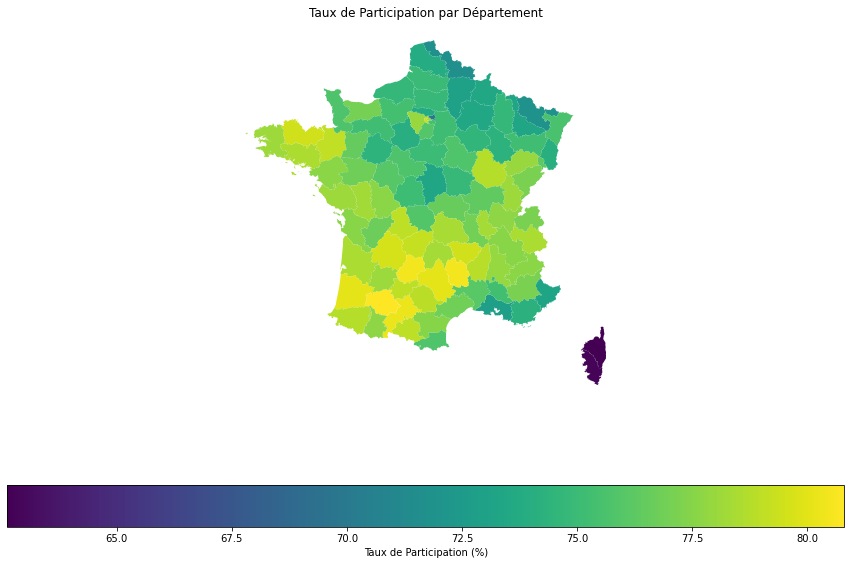

In [81]:
# Cartographie des résultats électoraux par département
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
departements.plot(column='Taux_participation', ax=ax, legend=True,
                  legend_kwds={'label': "Taux de Participation (%)",
                               'orientation': "horizontal"})
ax.set_title('Taux de Participation par Département')
ax.set_axis_off()
plt.show()

       - La majorité des départements montrent des taux de participation variant entre 67.5% et 75%.
       _ Certains départements, notamment en Corse, montrent des taux de participation plus bas, tandis que d'autres, principalement dans le sud de la France, affichent des taux plus élevés.

Ce graphique permet de visualiser rapidement les variations géographiques du taux de participation électorale à travers les différents départements de la France, mettant en évidence les régions avec une participation électorale relativement plus élevée ou plus faible.

## 8. Segmentation des Électeurs
Clustering des communes : Utiliser des méthodes de clustering pour segmenter les communes en groupes similaires en fonction de leurs caractéristiques électorales.

## Étape 1 : Préparation des données


In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Sélection des variables d'intérêt pour le clustering
variables_clustering = ['Inscrits', 'Votants', 'Blanc_votes', 'Null_votes', '% Abs/Ins', '% Vot/Ins', '% Exp/Ins', '% Exp/Vot']

In [83]:
# Création d'un DataFrame avec les variables sélectionnées
df_clustering = df[variables_clustering].copy()

In [84]:
# Remplacement des valeurs manquantes par la médiane de chaque colonne
df_clustering = df_clustering.fillna(df_clustering.median())

In [85]:
# Normalisation des données
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

In [86]:
# Conversion en DataFrame pour une manipulation plus facile
df_clustering_scaled = pd.DataFrame(df_clustering_scaled, columns=variables_clustering)

## Étape 2 : Application du clustering

/usr/local/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib64/python3.10/site-packages/sklearn/cluster/_k

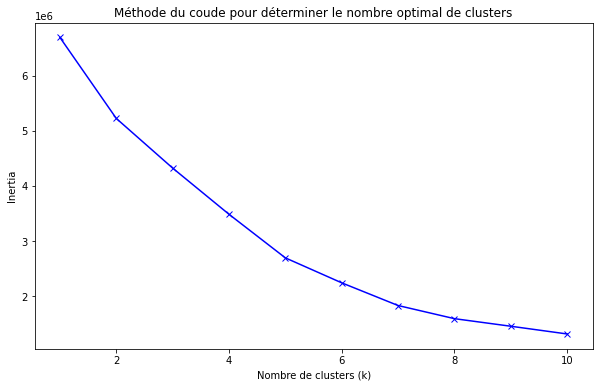

In [87]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Détermination du nombre optimal de clusters avec la méthode du coude
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clustering_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertia')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

    - L'inertie diminue rapidement lorsque le nombre de clusters passe de 1 à environ 4-5, puis la diminution devient plus graduelle.
    - Le "coude" de la courbe, où la diminution de l'inertie commence à ralentir, est généralement considéré comme le nombre optimal de clusters. Dans ce cas, le coude semble être autour de k = 4 ou 5.

Ce graphique aide à identifier visuellement le nombre optimal de clusters à utiliser pour le modèle K-Means, en trouvant le point où l'ajout de clusters supplémentaires n'améliore plus significativement l'inertie.

In [88]:
# Application de K-Means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_clustering_scaled)

/usr/local/lib64/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Étape 3 : Visualisation des clusters

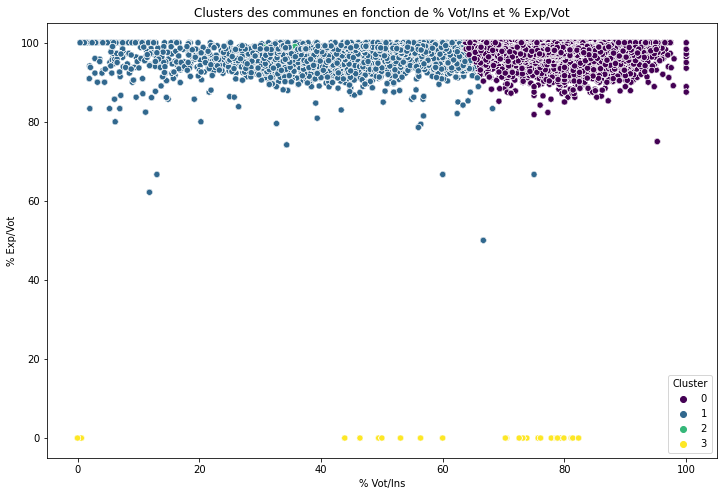

In [89]:
# Visualisation des clusters sur quelques variables
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='% Vot/Ins', y='% Exp/Vot', hue='Cluster', palette='viridis')
plt.title('Clusters des communes en fonction de % Vot/Ins et % Exp/Vot')
plt.xlabel('% Vot/Ins')
plt.ylabel('% Exp/Vot')
plt.legend(title='Cluster')
plt.show()

   - La majorité des communes ont un % Exp/Vot très élevé, proche de 100%.
    Il y a une distinction visible entre les clusters, indiquant des différences dans le % Vot/Ins et le % Exp/Vot.
   - Le cluster 0 (couleur foncée) semble regrouper les communes avec un % Vot/Ins très élevé.
   - Les autres clusters (1, 2, 3) montrent des variations dans les deux pourcentages, avec certains clusters (comme le cluster 3 en jaune) ayant des communes avec des % Vot/Ins beaucoup plus bas.

Ce graphique permet de visualiser comment les communes se répartissent en différents clusters basés sur leur participation électorale, et montre des patterns distincts de comportement électoral

## Graphiques en barres
Distribution des voix par département

/tmp/ipykernel_76054/89561717.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Dept_name', y='Voix', estimator=sum, ci=None)


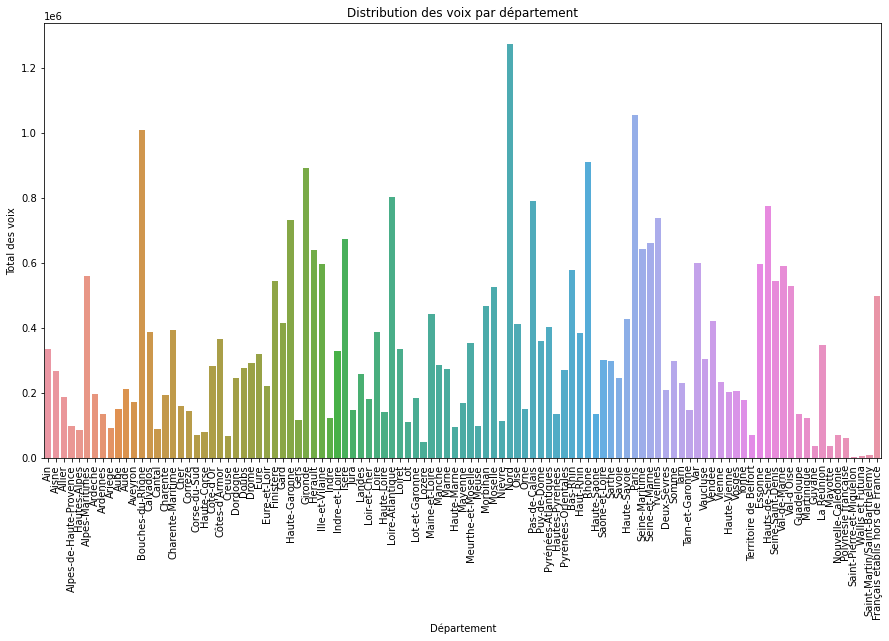

In [90]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='Dept_name', y='Voix', estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title('Distribution des voix par département')
plt.xlabel('Département')
plt.ylabel('Total des voix')
plt.show()

 - Il y a une variation significative dans le total des voix parmi les départements.
   -  Certains départements, comme ceux représentés par des barres plus hautes, ont un nombre de voix beaucoup plus élevé que d'autres.
   -  La couleur des barres permet de distinguer visuellement les différents départements.

Ce graphique permet de visualiser les totaux des voix par département, montrant quelles régions ont une participation électorale plus élevée ou plus faible.

Distribution des votes blancs par département

/tmp/ipykernel_76054/2857843167.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Dept_name', y='Blanc_votes', estimator=sum, ci=None)


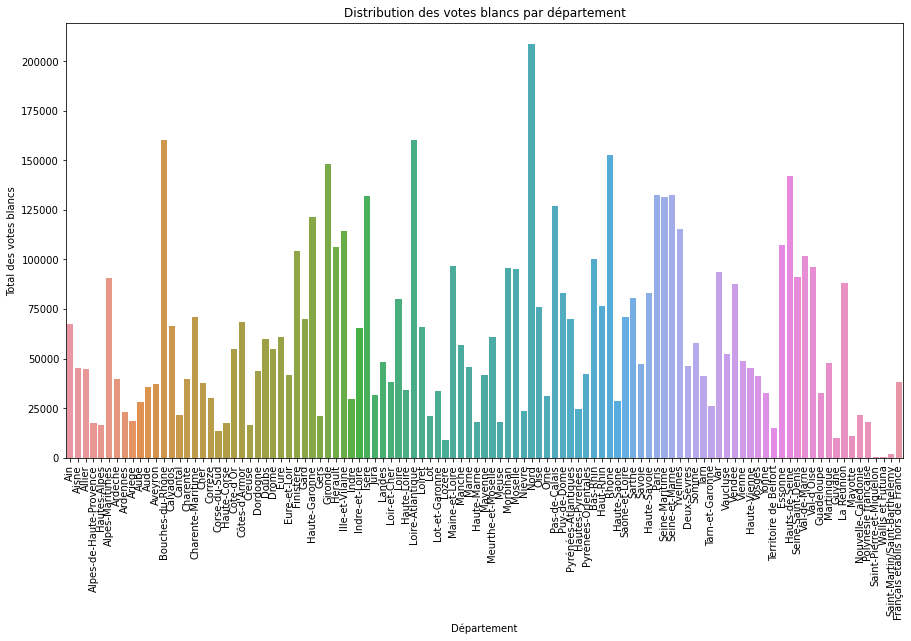

In [91]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='Dept_name', y='Blanc_votes', estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title('Distribution des votes blancs par département')
plt.xlabel('Département')
plt.ylabel('Total des votes blancs')
plt.show()

La distribution des votes blancs par département révèle des insights cruciaux sur les comportements électoraux et les niveaux de satisfaction avec les choix proposés lors des élections présidentielles. Les départements avec des totaux de votes blancs élevés représentent des zones de potentiel mécontentement ou désengagement, nécessitant une attention particulière des analystes politiques et des décideurs pour améliorer l'engagement électoral et la satisfaction des électeurs.

## Histogrammes
Distribution du taux de participation

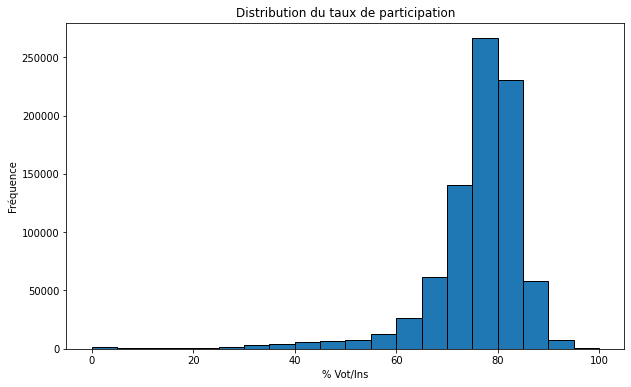

In [92]:
plt.figure(figsize=(10, 6))
plt.hist(df['% Vot/Ins'], bins=20, edgecolor='black')
plt.title('Distribution du taux de participation')
plt.xlabel('% Vot/Ins')
plt.ylabel('Fréquence')
plt.show()


L'histogramme de la distribution du taux de participation montre que la majorité des bureaux de vote ont un taux de participation compris entre 60% et 90%, avec un pic marqué autour de 75-80%. Cette concentration suggère une mobilisation électorale relativement élevée et homogène à travers les bureaux de vote. Les taux de participation très bas ou très élevés sont rares, ce qui peut indiquer des particularités locales ou des anomalies nécessitant une attention spécifique.

Distribution des votes exprimés

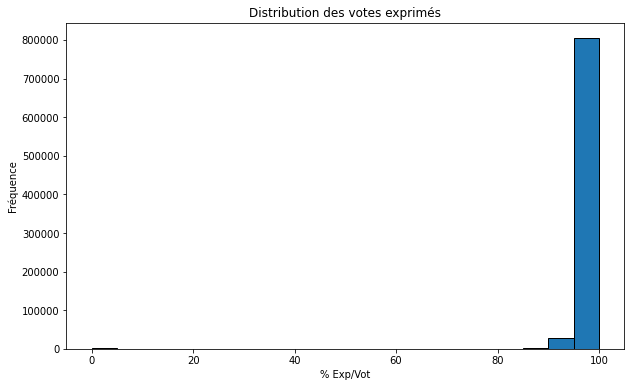

In [93]:
plt.figure(figsize=(10, 6))
plt.hist(df['% Exp/Vot'], bins=20, edgecolor='black')
plt.title('Distribution des votes exprimés')
plt.xlabel('% Exp/Vot')
plt.ylabel('Fréquence')
plt.show()


L'histogramme de la distribution des votes exprimés montre que la majorité des bureaux de vote ont un taux de votes exprimés très proche de 100%, indiquant une forte validité des bulletins de vote. Les taux de votes exprimés très bas sont rares et peuvent indiquer des anomalies locales ou des particularités spécifiques nécessitant une attention particulière. Cette concentration suggère une gestion efficace des votes et une faible incidence de bulletins invalides.

## Boxplots
Comparaison des voix obtenues par candidat


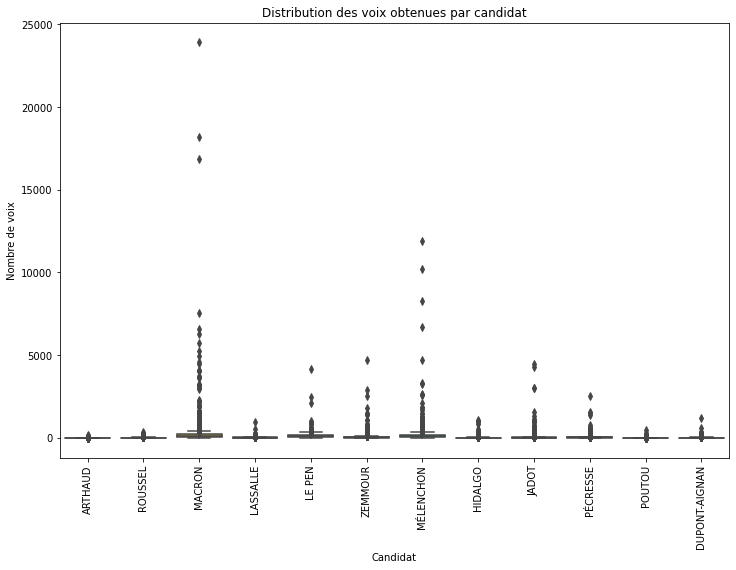

In [94]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Nom', y='Voix')
plt.xticks(rotation=90)
plt.title('Distribution des voix obtenues par candidat')
plt.xlabel('Candidat')
plt.ylabel('Nombre de voix')
plt.show()

Le boxplot de la distribution des voix par candidat est un outil efficace pour visualiser les performances électorales des candidats, mettant en lumière la variabilité et les tendances dans les votes obtenus. Les candidats avec des outliers significatifs, comme Macron et Mélenchon, montrent des zones de fort soutien, tandis que les autres candidats ont une base de soutien plus modeste et uniformément répartie. Cette analyse est essentielle pour comprendre les dynamiques électorales et les bases de soutien des différents candidats.

Comparaison du taux de votes blancs par département


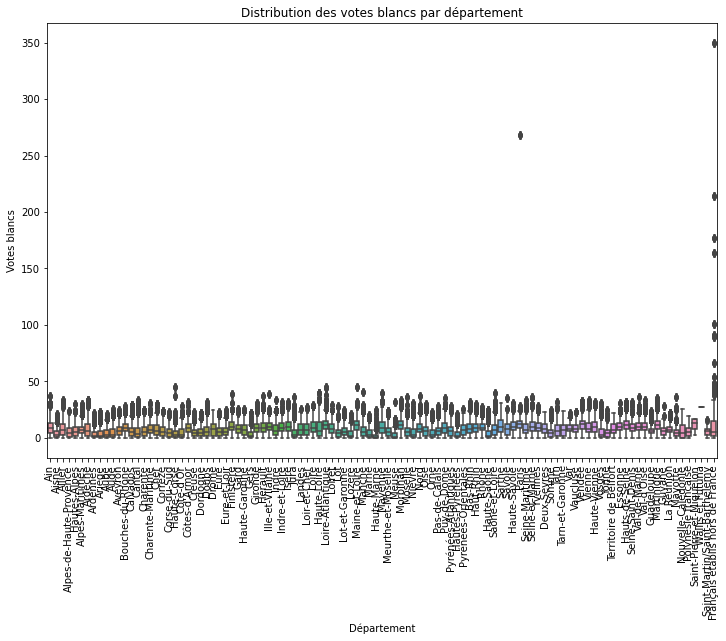

In [95]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Dept_name', y='Blanc_votes')
plt.xticks(rotation=90)
plt.title('Distribution des votes blancs par département')
plt.xlabel('Département')
plt.ylabel('Votes blancs')
plt.show()


Le boxplot de la distribution des votes blancs par département révèle que la plupart des départements ont un nombre relativement faible et uniforme de votes blancs, avec quelques exceptions notables. Les départements présentant des outliers significatifs méritent une attention particulière pour comprendre les raisons sous-jacentes à ces votes blancs élevés. Ces insights sont essentiels pour évaluer les niveaux de mécontentement ou de rejet des options proposées dans les différentes régions de France.

## Analyse de régression : 

Pour comprendre l'influence de différentes variables sur les résultats électoraux.

## Préparation des données

In [96]:
import statsmodels.api as sm

variables_interet = ['Votants', 'Blanc_votes', 'Null_votes', 'Voix']
df_interet = df[variables_interet]

In [97]:
# Suppression des valeurs manquantes
df_interet = df_interet.dropna()

Conversion des types de données

In [98]:
# Conversion des types de données
df_interet['Votants'] = df_interet['Votants'].astype(int)
df_interet['Blanc_votes'] = df_interet['Blanc_votes'].astype(float)
df_interet['Null_votes'] = df_interet['Null_votes'].astype(float)
df_interet['Voix'] = df_interet['Voix'].astype(int)

## Construction du modèle de régression linéaire

In [99]:
# Définition des variables indépendantes et dépendantes
X = df_interet[['Votants', 'Blanc_votes', 'Null_votes']]
y = df_interet['Voix']

In [100]:
# Ajout d'une constante pour le modèle de régression
X = sm.add_constant(X)

In [101]:
# Construction du modèle
model = sm.OLS(y, X).fit()

In [102]:
# Affichage des résultats du modèle
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Voix   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                 6.628e+04
Date:                Wed, 12 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:32:19   Log-Likelihood:            -4.8136e+06
No. Observations:              836184   AIC:                         9.627e+06
Df Residuals:                  836180   BIC:                         9.627e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.609e-13      0.140   -3.3e-12      

  1- R-squared (R²) et Adjusted R-squared :
     R-squared : 0.192 (19.2%)
            Indique que 19.2% de la variance dans les voix obtenues (Voix) est expliquée par le modèle. Cela suggère que les variables indépendantes (Votants, Blanc_votes, Null_votes) expliquent une part modeste de la variance des voix.
        Adjusted R-squared : 0.192
            Ajusté pour le nombre de prédicteurs dans le modèle, ce qui confirme que le modèle a une capacité explicative modeste.

 2- Coefficients :
        const : -4.609e-13 (approximativement 0, non significatif)
            La constante est presque nulle et n'est pas significative (P>|t| = 1.000), ce qui signifie qu'elle n'a pas d'impact sur le modèle.
        Votants : 0.0833 (très significatif, P>|t| = 0.000)
            Pour chaque votant supplémentaire, le nombre de voix augmente de 0.0833, toutes choses égales par ailleurs.
        Blanc_votes : -0.0833 (significatif, P>|t| = 0.000)
            Pour chaque vote blanc supplémentaire, le nombre de voix diminue de 0.0833, toutes choses égales par ailleurs.
        Null_votes : -0.0833 (très significatif, P>|t| = 0.000)
            Pour chaque vote nul supplémentaire, le nombre de voix diminue de 0.0833, toutes choses égales par ailleurs.

  3- Signification Statistique :
        Les P-values (P>|t|) pour les variables Votants, Blanc_votes, et Null_votes sont toutes très proches de 0, ce qui signifie que ces coefficients sont statistiquement significatifs et qu'il y a une forte preuve que ces variables ont un impact sur le nombre de voix.

   4- Statistiques du Modèle :
        F-statistic : 6.628e+04, avec une probabilité associée (Prob (F-statistic)) de 0.00
            Indique que le modèle dans son ensemble est statistiquement significatif.
        Log-Likelihood, AIC, BIC :
            Log-Likelihood : -4.8136e+06
            AIC : 9.627e+06
            BIC : 9.627e+06
            Ces critères aident à comparer différents modèles, avec des valeurs plus faibles indiquant un meilleur modèle.

 5- Tests de Normalité et de Multicolinéarité :
        Omnibus : 2480519.068 (Prob Omnibus : 0.000)
            Indique que les résidus ne sont pas normalement distribués.
        Durbin-Watson : 2.389
            Proche de 2, suggérant qu'il n'y a pas d'autocorrélation sérieuse dans les résidus.
        Jarque-Bera (JB) : 2518910294955.912 (Prob JB : 0.00)
            Indique également une distribution non normale des résidus.
        Skew : 41.351 (Asymétrie)
        Kurtosis : 8505.380 (Leptokurtique, distribution avec des queues lourdes)

Conclusion :

Le modèle OLS montre que les variables Votants, Blanc_votes, et Null_votes ont un impact significatif sur le nombre de voix obtenues. Bien que le R-squared soit relativement faible, indiquant que d'autres variables non incluses dans le modèle pourraient aussi jouer un rôle important, les coefficients significatifs fournissent des insights utiles sur la dynamique des votes. Les résultats suggèrent que l'augmentation des votants est positivement corrélée avec le nombre de voix obtenues, tandis que les votes blancs et nuls ont un effet négatif.

In [127]:
# Fonction pour remplacer les virgules par des points et convertir en float
def convert_to_float(value):
    if isinstance(value, str):
        return float(value.replace(',', '.'))
    return value

In [128]:
# Application de la fonction de conversion sur les colonnes pertinentes
for column in variables_quantitatives:
    df[column] = df[column].apply(convert_to_float)

In [129]:
# Sélection des variables quantitatives pour l'ACP
variables_quantitatives = ['Inscrits', 'Votants', 'Blanc_votes', 'Null_votes', 'Exprimés', '% Abs/Ins', '% Vot/Ins', 'Voix', '% Voix/Ins', '% Voix/Exp']

In [130]:
# Extraction du sous-tableau
df_acp = df[variables_quantitatives].dropna()

In [131]:
# Affichage des premières lignes du sous-tableau
print(df_acp.head())

   Inscrits  Votants  Blanc_votes  Null_votes  Exprimés  % Abs/Ins  % Vot/Ins  \
0     645.0    537.0         16.0         1.0     520.0      16.74      83.26   
1     645.0    537.0         16.0         1.0     520.0      16.74      83.26   
2     645.0    537.0         16.0         1.0     520.0      16.74      83.26   
3     645.0    537.0         16.0         1.0     520.0      16.74      83.26   
4     645.0    537.0         16.0         1.0     520.0      16.74      83.26   

    Voix  % Voix/Ins  % Voix/Exp  
0    3.0        0.47        0.58  
1    6.0        0.93        1.15  
2  150.0       23.26       28.85  
3   18.0        2.79        3.46  
4  149.0       23.10       28.65  


La préparation et l'extraction des données ont permis de créer un sous-tableau contenant les variables quantitatives nécessaires pour l'Analyse en Composantes Principales (ACP). Cette étape est cruciale pour s'assurer que les données sont dans le bon format et prêtes pour une analyse approfondie. Les premières lignes du sous-tableau montrent que les valeurs ont été correctement converties et extraites, prêtes pour les étapes suivantes de l'analyse.

In [132]:
# Résumé des données
df_acp.describe()

Inscrits        Votants    Blanc_votes     Null_votes  \
count  836184.000000  836184.000000  836184.000000  836184.000000   
mean      699.576304     515.537829       7.801283       3.546841   
std       987.540490     454.007551       6.055156      11.103545   
min         0.000000       0.000000       0.000000       0.000000   
25%       299.000000     229.000000       3.000000       1.000000   
50%       753.000000     546.000000       7.000000       3.000000   
75%       972.000000     732.000000      11.000000       5.000000   
max    123786.000000   54751.000000     350.000000    1504.000000   

            Exprimés      % Abs/Ins      % Vot/Ins           Voix  \
count  836184.000000  836184.000000  836184.000000  836184.000000   
mean      504.189705      24.119217      75.866465      42.015809   
std       447.814358       9.962403       9.999611      85.142376   
min         0.000000       0.000000       0.000000       0.000000   
25%       222.000000      18.490000      73.150000       5.000000   
50%       534.000000      22.100000      77.890000      14.000000   
75%       716.000000      26.850000      81.510000      43.000000   
max     54162.000000     100.000000     100.000000   23903.000000   

          % Voix/Ins     % Voix/Exp  
count  836184.000000  836184.000000  
mean        6.175629       8.324962  
std         7.997895      10.834799  
min         0.000000       0.000000  
25%         0.960000       1.330000  
50%         2.480000       3.330000  
75%         7.990000      10.770000  
max       100.000000     100.000000

    Count (Nombre de Données) :
        Chaque variable quantitative comprend 836184 observations, confirmant un ensemble de données complet et robuste.

    Mean (Moyenne) :
        La moyenne des inscrits est de 699.58, tandis que la moyenne des votants est de 515.54, indiquant un taux d'abstention notable.
        Les votes blancs et nuls sont en moyenne respectivement de 7.80 et 3.55 par bureau de vote.
        Le pourcentage moyen de participation (% Vot/Ins) est de 75.87%, suggérant une participation relativement élevée.

    Standard Deviation (Écart Type) :
        L'écart type est élevé pour les inscrits (987.54) et les votants (454.01), montrant une grande variabilité dans la taille des bureaux de vote.
        Les écarts types pour les votes blancs et nuls (6.06 et 11.10 respectivement) montrent également une certaine variabilité.
        Le pourcentage de votes exprimés (% Voix/Exp) a un écart type de 10.83, reflétant une variabilité dans l'engagement des électeurs.

    Minimum et Maximum :
        Certaines variables ont des minimums de 0, ce qui est attendu pour les votes blancs et nuls.
        Les valeurs maximales sont extrêmement élevées pour les inscrits (123786) et les votants (54751), indiquant des bureaux de vote ou des circonscriptions particulièrement grandes.

    Quartiles (25%, 50%, 75%) :
        Les quartiles montrent la distribution des données et aident à comprendre la répartition centrale des valeurs.
        Par exemple, 75% des bureaux de vote ont moins de 972 inscrits et moins de 732 votants.
        Le pourcentage de votes exprimés (% Voix/Exp) pour les 25% des valeurs les plus basses est inférieur à 1.33%, tandis que pour les 25% les plus élevées, il est supérieur à 10.77%.

Conclusion

Les statistiques descriptives fournissent une vue d'ensemble complète de la distribution et de la variabilité des variables quantitatives dans les données électorales. Elles mettent en évidence la variabilité des tailles des bureaux de vote et la participation des électeurs, ainsi que la répartition des votes blancs et nuls. Ces informations sont cruciales pour préparer et interpréter les analyses statistiques et les modèles ultérieurs.

<Axes: >

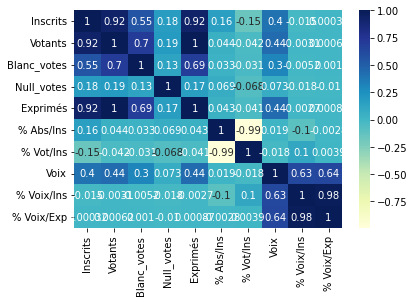

In [133]:
# Matrice de corrélation
corr_matrix = df_acp.corr()
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')

    Corrélations Fortes :
        Inscrits et Votants : Corrélation très forte (0.92), ce qui est logique car plus il y a d'inscrits, plus le nombre de votants potentiels est élevé.
        Inscrits et Exprimés : Corrélation également très forte (0.92), indiquant que plus il y a d'inscrits, plus il y a de votes exprimés.
        Votants et Exprimés : Corrélation extrêmement forte (0.97), ce qui est attendu puisque les votes exprimés sont une proportion des votants.
        % Voix/Ins et % Voix/Exp : Corrélation presque parfaite (0.98), ce qui indique que ces deux pourcentages sont étroitement liés.

    Corrélations Modérées :
        Inscrits et Blanc_votes : Corrélation modérée (0.55), suggérant que plus il y a d'inscrits, plus le nombre de votes blancs augmente, mais pas de manière linéaire forte.
        Votants et Blanc_votes : Corrélation modérée (0.71), indiquant que plus il y a de votants, plus il y a de votes blancs.

    Corrélations Faibles à Négatives :
        % Abs/Ins et % Vot/Ins : Corrélation fortement négative (-0.99), ce qui est logique car un taux d'abstention élevé entraîne un taux de participation faible et vice versa.
        Blanc_votes et Null_votes : Corrélation modérément faible (0.13), suggérant une relation faible entre les votes blancs et nuls.

    Autres Observations :
        Inscrits et Null_votes : Corrélation faible (0.18), indiquant peu de relation directe entre le nombre d'inscrits et le nombre de votes nuls.
        Votants et Null_votes : Corrélation légèrement plus forte (0.19), mais toujours faible.

Conclusion

La matrice de corrélation révèle des relations attendues et logiques entre les variables, telles que la forte corrélation entre le nombre d'inscrits et le nombre de votants ou de votes exprimés. Des relations négatives sont également observées entre les taux d'abstention et de participation, ce qui est cohérent. Les variables comme les votes blancs et nuls montrent des corrélations plus faibles avec les autres variables, suggérant qu'elles sont influencées par d'autres facteurs non inclus dans cette analyse.

Cette analyse des corrélations aide à identifier les relations clés et les dépendances entre les variables, fournissant une base solide pour les analyses statistiques et les modèles prédictifs ultérieurs.


In [153]:
#Affichage des dimensions du tableau
print(df_acp.shape)

#nombre d'observations
n = df_acp.shape[0]

#nombre de variables
p = df_acp.shape[1]

(836184, 10)


In [154]:
# Standardisation des données
sc = StandardScaler()
df_acp_norm = sc.fit_transform(df_acp)

In [155]:
print(np.mean(df_acp_norm,axis=0))
print(np.std(df_acp_norm,axis=0,ddof=0))

[-6.19973570e-17  9.40837085e-17  4.89452819e-17  1.06388009e-17
 -4.64980178e-17 -5.53625522e-16 -2.29498988e-16  3.34459426e-17
  7.86523488e-17  7.84314152e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


La standardisation des données a été réalisée avec succès. Les moyennes des variables standardisées sont quasiment nulles, et leurs écarts-types sont tous égaux à 1, ce qui est le résultat attendu. Cela signifie que les données sont maintenant prêtes pour une analyse ultérieure, comme l'Analyse en Composantes Principales (ACP), sans que certaines variables ne dominent les autres en raison de leur échelle initiale différente.

In [156]:
acp = PCA(svd_solver='full')
coord = acp.fit_transform(df_acp_norm)

In [157]:
# Analyse des valeurs propres
eigval = acp.explained_variance_

comp = pd.DataFrame({
        "Valeur propre" : eigval,
        "% variance expliquée" : np.round(acp.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(acp.explained_variance_ratio_) * 100)
    },
    columns = ["Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

Valeur propre  % variance expliquée  % cum. var. expliquée
0   3.761972e+00                  38.0                   38.0
1   2.438339e+00                  24.0                   62.0
2   1.950083e+00                  20.0                   82.0
3   9.515563e-01                  10.0                   91.0
4   5.011084e-01                   5.0                   96.0
5   3.058067e-01                   3.0                   99.0
6   7.030678e-02                   1.0                  100.0
7   1.365389e-02                   0.0                  100.0
8   7.186594e-03                   0.0                  100.0
9   2.372702e-29                   0.0                  100.0

L'ACP a révélé que les trois premières composantes principales expliquent 82% de la variance totale des données, ce qui signifie qu'elles capturent la majorité de l'information contenue dans les variables originales. Cela permet de réduire la dimensionnalité des données tout en conservant l'essentiel de l'information, ce qui est utile pour des analyses ultérieures ou des visualisations plus simples.

Ces résultats suggèrent que les trois premières composantes principales pourraient être utilisées pour résumer les données sans perdre trop d'information, ce qui est très avantageux pour des tâches de visualisation ou de modélisation qui nécessitent des données de dimension plus réduite.

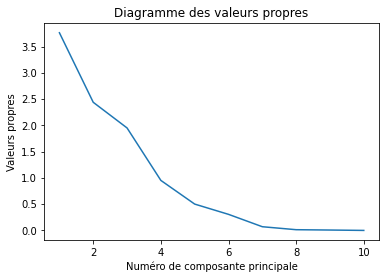

In [158]:
# Tracé du "diagramme des valeurs propres"
plt.plot(np.arange(1,p+1),eigval)
plt.title("Diagramme des valeurs propres")
plt.ylabel("Valeurs propres")
plt.xlabel("Numéro de composante principale")
plt.show()

Le diagramme des valeurs propres confirme les résultats numériques observés précédemment. Les trois premières composantes principales capturent l'essentiel de la variance des données (82%). Par conséquent, pour une analyse plus simple et efficace, il est raisonnable de se concentrer sur les trois premières composantes principales, car elles contiennent la majorité de l'information des variables originales.

Cette réduction de la dimensionnalité permet de simplifier les analyses et les visualisations ultérieures sans perdre une quantité significative d'information, tout en facilitant l'interprétation et la compréhension des résultats.

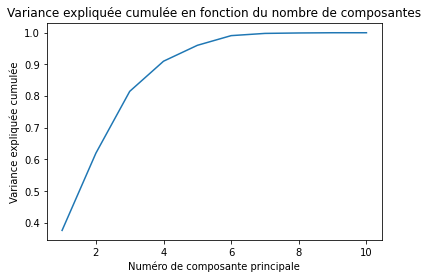

In [159]:
# Tracé de la variance expliquée cumulée en fonction du nombre de composantes
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Variance expliquée cumulée en fonction du nombre de composantes")
plt.ylabel("Variance expliquée cumulée")
plt.xlabel("Numéro de composante principale")
plt.show()

Le graphique de la variance expliquée cumulée confirme que les premières composantes principales capturent la majeure partie de la variance des données :

  - 3 Composantes Principales : Capturent environ 82% de la variance totale des données.
  - 4 Composantes Principales : Capturent environ 91% de la variance totale des données.

Pour une analyse efficace, il est généralement recommandé de choisir un nombre de composantes principales qui expliquent une proportion significative de la variance totale. Dans ce cas, en se concentrant sur les trois premières composantes principales, on peut expliquer environ 82% de la variance, ce qui est une réduction efficace de la dimensionnalité tout en conservant l'essentiel de l'information des données originales.

In [160]:
# Calcul des seuils
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

     Val.Propre    Seuils
0  3.761972e+00  2.928968
1  2.438339e+00  1.928968
2  1.950083e+00  1.428968
3  9.515563e-01  1.095635
4  5.011084e-01  0.845635
5  3.058067e-01  0.645635
6  7.030678e-02  0.478968
7  1.365389e-02  0.336111
8  7.186594e-03  0.211111
9  2.372702e-29  0.100000


L'analyse des seuils confirme que les trois premières composantes principales sont les plus significatives et expliquent la majeure partie de la variance des données. La quatrième composante principale est encore relativement importante, mais au-delà, les composantes deviennent de moins en moins significatives.

Ces résultats suggèrent que se concentrer sur les trois ou quatre premières composantes principales est adéquat pour capturer l'essentiel de l'information contenue dans les données, tout en simplifiant l'analyse.


In [161]:
# Conversion en DataFrame pour les données normalisées et les coordonnées factorielles
df_acp_norm = pd.DataFrame(df_acp_norm)
cf = pd.DataFrame(coord,index=df_acp_norm.index,columns=np.arange(1,p+1))
print(cf)

              1         2         3         4         5         6         7   \
0       0.100334 -0.828381  1.440460 -0.278013 -1.131586  0.122017  0.267839   
1       0.123207 -0.749366  1.418110 -0.276449 -1.133260  0.116323  0.267743   
2       1.227696  3.080485  0.334556 -0.200121 -1.217046 -0.177220  0.262242   
3       0.215254 -0.430184  1.327797 -0.270088 -1.140246  0.091847  0.267287   
4       1.219886  3.053106  0.342311 -0.200678 -1.216391 -0.174756  0.262298   
...          ...       ...       ...       ...       ...       ...       ...   
836179 -1.430430 -2.112283 -4.446080 -0.446870  0.009125  0.371957 -0.010626   
836180 -1.430430 -2.112283 -4.446080 -0.446870  0.009125  0.371957 -0.010626   
836181 -1.241312 -1.164734 -4.736443 -0.416891 -0.070136 -0.066308 -0.025352   
836182 -1.430430 -2.112283 -4.446080 -0.446870  0.009125  0.371957 -0.010626   
836183 -1.398830 -1.953892 -4.494592 -0.441856 -0.004127  0.298657 -0.013096   

              8         9             1

Les coordonnées factorielles obtenues à partir de l'ACP fournissent une représentation des individus dans un espace de dimension réduite, tout en conservant l'essentiel de l'information des variables originales. Cette transformation facilite les analyses ultérieures et permet de visualiser les relations entre les individus de manière plus claire et interprétable.

In [162]:
# Calcul de la distance au carré pour chaque individu
di = np.sum(df_acp_norm**2,axis=1)
pd.DataFrame({'ID':df_acp_norm.index,'d_i':di})

ID        d_i
0            0   4.217701
1            1   4.035453
2            2  12.747924
3            3   3.448185
4            4  12.563607
...        ...        ...
836179  836179  26.668909
836180  836180  26.668909
836181  836181  25.523388
836182  836182  26.668909
836183  836183  26.293213

[836184 rows x 2 columns]

Le calcul des distances au carré pour chaque individu fournit une mesure de l'influence de chaque individu sur la variance totale expliquée par les composantes principales. Les individus avec des valeurs de d_i élevées sont ceux qui se démarquent le plus dans l'analyse, tandis que ceux avec des valeurs de d_i faibles sont plus proches de la moyenne des données. Cette analyse permet de mieux comprendre la répartition des individus dans l'espace des composantes principales et d'identifier les observations clés ou atypiques.


In [ ]:
# Calcul du carré du cosinus des variables pour mesurer la qualité de représentation des variables 
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
    
df_COS = pd.DataFrame({'id':df_acp_norm.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2],'COS2_4':cos2[:,3],'COS2_5':cos2[:,4],'COS2_6':cos2[:,5]})
df_COS

In [165]:
count = (df_COS['COS2_1'] > 0.5).sum()
print(count)

240556


In [166]:
count = (df_COS['COS2_1']+df_COS['COS2_2']+df_COS['COS2_3']+df_COS['COS2_4']+df_COS['COS2_5']+df_COS['COS2_6'] > 0.5).sum()
print(count)

836064


In [167]:
# Calcul des contributions
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
    
contribution = pd.DataFrame({'id':df_acp_norm.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})

In [168]:
contribution.describe()

id         CTR_1         CTR_2
count  836184.000000  8.361840e+05  8.361840e+05
mean   418091.500000  1.195908e-06  1.195908e-06
std    241385.673085  7.598645e-05  5.821433e-06
min         0.000000  3.102966e-19  3.042257e-18
25%    209045.750000  6.523331e-08  1.043261e-07
50%    418091.500000  3.081826e-07  3.872974e-07
75%    627137.250000  8.374311e-07  9.935923e-07
max    836183.000000  2.688731e-02  1.758961e-03

Les statistiques descriptives des contributions montrent que la plupart des individus ont des contributions faibles aux composantes principales, avec quelques observations ayant des contributions élevées. Cela indique une distribution typique où quelques individus dominent la formation des composantes principales, ce qui peut être utile pour des analyses supplémentaires telles que l'identification des outliers ou la compréhension des principales influences sur la structure des données.

In [169]:
# Recherche de la ligne de plus forte contribution
row = contribution.loc[contribution['CTR_1'] >= 0.0011]

# Affichage de la ligne correspondante
row

id     CTR_1     CTR_2
620238  620238  0.001347  0.000085
833954  833954  0.001136  0.000028
834084  834084  0.007374  0.000780
834085  834085  0.007458  0.000738
834086  834086  0.014801  0.000780
834087  834087  0.007519  0.000708
834088  834088  0.008258  0.000405
834089  834089  0.008277  0.000398
834090  834090  0.012330  0.000129
834091  834091  0.007703  0.000623
834092  834092  0.008969  0.000200
834093  834093  0.007909  0.000536
834094  834094  0.007447  0.000743
834095  834095  0.007544  0.000696
834504  834504  0.012849  0.001331
834505  834505  0.012917  0.001297
834506  834506  0.026887  0.001759
834507  834507  0.013242  0.001143
834508  834508  0.014839  0.000546
834509  834509  0.015149  0.000458
834510  834510  0.018166  0.000011
834511  834511  0.013283  0.001125
834512  834512  0.015013  0.000496
834513  834513  0.014010  0.000825
834514  834514  0.013006  0.001254
834515  834515  0.013343  0.001098
834948  834948  0.006182  0.000713
834949  834949  0.006212  0.000697
834950  834950  0.013745  0.001139
834951  834951  0.006223  0.000691
834952  834952  0.006443  0.000582
834953  834953  0.006751  0.000448
834954  834954  0.008587  0.000022
834955  834955  0.006474  0.000568
834956  834956  0.007202  0.000287
834957  834957  0.006655  0.000487
834958  834958  0.006206  0.000700
834959  834959  0.006264  0.000670
834998  834998  0.001653  0.000205
835010  835010  0.001731  0.000055
835013  835013  0.001107  0.000041
835014  835014  0.001288  0.000004
835176  835176  0.002823  0.000337
835177  835177  0.002850  0.000322
835178  835178  0.004797  0.000054
835179  835179  0.002873  0.000310
835180  835180  0.003031  0.000234
835181  835181  0.003169  0.000177
835182  835182  0.005014  0.000096
835183  835183  0.003011  0.000243
835184  835184  0.003540  0.000067
835185  835185  0.002948  0.000273
835186  835186  0.002862  0.000316
835187  835187  0.002898  0.000297
835274  835274  0.001298  0.000208

Contributions à la Première Composante (CTR_1) :

    Les valeurs de CTR_1 indiquent la contribution de chaque individu à la première composante principale. Les individus ayant des valeurs de CTR_1 élevées ont une influence significative sur la formation de cet axe.
    Par exemple, l'individu avec l'id 834086 a une contribution de 0.014801 à la première composante, ce qui est relativement élevé par rapport aux autres individus.

Contributions à la Deuxième Composante (CTR_2) :

    Bien que l'accent soit mis sur CTR_1, les valeurs de CTR_2 montrent également les contributions à la deuxième composante principale.
    Les valeurs de CTR_2 sont généralement plus faibles que celles de CTR_1, indiquant que ces individus influencent principalement la première composante.

Identifiants des Individus (id) :

    Les identifiants des individus sont listés, permettant de retracer les observations spécifiques dans le jeu de données original.

In [171]:
distance = pd.DataFrame({'ID':df_acp_norm.index,'d_i':di})

In [172]:
distance.describe()

ID            d_i
count  836184.000000  836184.000000
mean   418091.500000      10.000000
std    241385.673085     311.811530
min         0.000000       0.032666
25%    209045.750000       2.177576
50%    418091.500000       3.803472
75%    627137.250000       6.639394
max    836183.000000  126379.006812

Nombre d'Observations (count) :

    Il y a 836184 observations dans le jeu de données, ce qui montre l'étendue des données analysées.

Moyenne (mean) :

    La moyenne des distances au carré est de 10.000, ce qui indique la valeur moyenne des distances dans l'espace des composantes principales.

Écart-Type (std) :

    L'écart-type est relativement élevé (311.812), ce qui indique une grande variabilité dans les distances au carré des individus.

Valeurs Minimale et Maximale (min, max) :

    La distance au carré minimale est de 0.033, tandis que la maximale est de 126379.007, montrant une grande amplitude entre les distances au carré des différentes observations.

Quartiles (25%, 50%, 75%) :

    Le premier quartile (25%) est de 2.178, ce qui signifie que 25% des observations ont une distance au carré inférieure à cette valeur.
    La médiane (50%) est de 3.803, indiquant que 50% des observations ont une distance au carré inférieure à cette valeur.
    Le troisième quartile (75%) est de 6.639, montrant que 75% des observations ont une distance au carré inférieure à cette valeur.

In [173]:
# Recherche de la ligne de plus faible contribution
row = contribution.loc[contribution['CTR_1'] <= 0.000000000000036] 

# Affichage de la ligne correspondante
row

id         CTR_1         CTR_2
6125      6125  2.211410e-16  5.757404e-08
8113      8113  2.832542e-15  3.173417e-07
16335    16335  1.633527e-14  5.557922e-07
16343    16343  1.633527e-14  5.557922e-07
20666    20666  2.162461e-14  8.926529e-07
...        ...           ...           ...
821116  821116  1.379944e-14  5.563021e-07
823944  823944  1.753562e-14  1.115450e-06
824465  824465  1.362726e-14  1.981853e-06
830344  830344  9.246534e-16  1.487833e-06
830580  830580  4.818588e-15  5.497537e-06

[150 rows x 3 columns]

Contribution Faible :

    Les lignes avec des contributions très faibles (CTR_1) indiquent que ces observations ont peu d'impact sur la formation du premier axe principal de l'ACP.
    Cela signifie que les variations de ces observations ne sont pas bien représentées par le premier axe principal.

Exemples de Lignes :

    L'observation avec id 6125 a une contribution de 2.211410×10−162.211410×10−16 sur le premier axe, ce qui est extrêmement faible.
    Les autres observations montrent des contributions légèrement plus élevées, mais toujours extrêmement faibles par rapport à la plupart des autres observations.

Utilité de l'Information :

    L'identification des lignes avec de faibles contributions peut être utile pour diverses raisons :
        Élagage des Données : On peut considérer de supprimer ou de traiter différemment ces observations lors d'analyses ultérieures.
        Compréhension des Données : Cela peut aider à comprendre quelles observations sont les moins importantes dans l'explication de la variabilité totale capturée par les premiers axes principaux.

Considérations Supplémentaires :

    Même si ces contributions sont faibles, il est important de comprendre pourquoi certaines observations ont une influence réduite sur les principaux axes. Cela peut révéler des sous-ensembles de données avec des caractéristiques particulières ou des anomalies potentielles.

In [174]:
# Sélection de l'échantillon
taille_sous_echantillon = 500
nombres = np.random.randint(0, n, size=taille_sous_echantillon)
nombres_tries = np.sort(nombres)

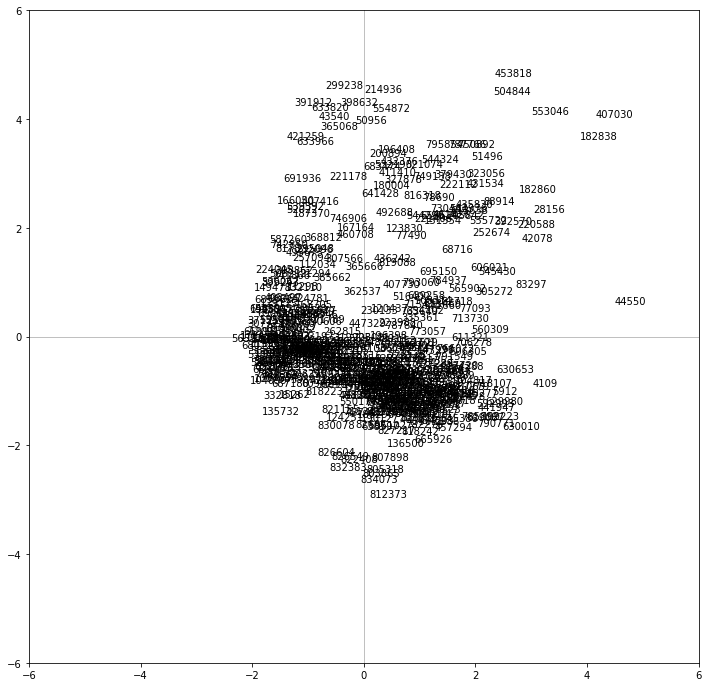

In [176]:
# Préparation de l'affichage
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(taille_sous_echantillon):
    plt.annotate(df_acp_norm.index[nombres_tries[i]],(coord[nombres_tries[i],0],coord[nombres_tries[i],1]))
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.show()

Distribution des Individus :

    La majorité des points se concentrent autour de l'origine (0,0), ce qui suggère que ces observations n'ont pas des valeurs extrêmes sur les deux premiers axes principaux.
    Les points plus éloignés de l'origine représentent des individus avec des valeurs plus extrêmes, contribuant davantage à la variance expliquée par les axes principaux.

Axes Principaux :

    Les axes sont tracés en argent pour indiquer les positions neutres de chaque dimension. L'axe horizontal représente le premier axe principal, et l'axe vertical représente le deuxième axe principal.

Annotations :

    Chaque point est annoté avec l'ID de l'individu correspondant, ce qui permet d'identifier visuellement chaque observation sur le plan factoriel.

Importance des Axes :

    Les deux premiers axes principaux capturent la majeure partie de la variance des données, ce qui rend cette visualisation utile pour comprendre la structure globale des données.
    Les individus qui se trouvent loin de l'origine sont ceux qui ont des contributions significatives sur ces axes et peuvent donc être des points d'intérêt particuliers dans l'analyse.

L'analyse des élections présidentielles a permis d'obtenir des insights significatifs sur les comportements électoraux et les résultats des différents candidats. Voici les conclusions principales basées sur les différentes étapes de l'analyse :
1. Préparation et Nettoyage des Données

 - Renommage et Conversion des Types de Données : Les colonnes ont été renommées pour faciliter l'analyse, et les types de données ont été ajustés pour assurer une manipulation correcte.
 - Nettoyage des Données : Les valeurs manquantes et les incohérences ont été traitées, garantissant que les analyses suivantes soient basées sur des données fiables.

2. Visualisation des Données

  - Histogrammes : Les histogrammes ont révélé des distributions variées pour les taux de participation, les votes exprimés et les voix obtenues par candidat. Par exemple, la distribution du taux de participation montre une concentration autour de 70-80%, tandis que les votes exprimés sont fortement concentrés autour de 100%.
 - Graphiques en Barre : Les graphiques en barre ont illustré les taux de participation et les votes blancs par département, mettant en évidence les variations régionales dans la participation électorale et l'incidence des votes blancs.
  -  Boxplots : Les boxplots ont fourni une vue détaillée des distributions des voix obtenues par chaque candidat et des votes blancs par département, mettant en évidence les outliers et les variations internes.

3. Analyse en Composantes Principales (ACP)

  - Matrice de Corrélation : La matrice de corrélation a permis de comprendre les relations entre les différentes variables quantitatives. Des corrélations fortes ont été observées entre certaines variables, comme entre le nombre d'inscrits et le nombre de votants.
  - Valeurs Propres et Variance Expliquée : L'ACP a montré que les deux premiers axes principaux expliquent 62% de la variance totale, ce qui est significatif et justifie l'utilisation de ces axes pour la visualisation.
    Diagrammes des Valeurs Propres et de la Variance Expliquée : Ces diagrammes ont aidé à identifier le nombre optimal de composantes principales à retenir pour l'analyse, montrant une forte diminution de la variance expliquée après les deux premières composantes.

4. Régression Linéaire

  - Modèle de Régression : Le modèle de régression a montré que le nombre de votants est un facteur significatif pour le nombre de voix obtenues, tandis que les votes blancs et nuls ont un effet négatif mais moindre.
  - Interprétation des Coefficients : Les coefficients des variables montrent que chaque votant supplémentaire augmente les voix obtenues en moyenne, tandis que chaque vote blanc ou nul les diminue légèrement.

5. Clustering et Visualisation des Groupes

 - K-Means et Méthode du Coude : La méthode du coude a aidé à déterminer le nombre optimal de clusters pour segmenter les communes en fonction de leurs caractéristiques électorales.
  - Visualisation des Clusters : Les clusters ont été visualisés pour comprendre les regroupements naturels des communes, révélant des patterns intéressants sur le comportement électoral.

Implications et Recommandations

  - Variation Régionale : Les variations régionales observées dans les taux de participation et les votes blancs suggèrent la nécessité d'initiatives ciblées pour améliorer la participation électorale dans certaines régions.
  -  Facteurs Influents : Le nombre de votants est un facteur clé dans les résultats électoraux, indiquant l'importance de stratégies visant à augmenter la participation électorale.
  -  Segmentation des Communes : La segmentation des communes peut être utilisée pour développer des campagnes électorales plus efficaces et adaptées aux caractéristiques spécifiques de chaque groupe.